In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Hackathon_Working_Data.csv")
df.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [3]:
df.columns

Index(['MONTH', 'STORECODE', 'DAY', 'BILL_ID', 'BILL_AMT', 'QTY', 'VALUE',
       'PRICE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'],
      dtype='object')

In [5]:
df.shape

(26985, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


In [30]:
df.isnull().sum()

MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

SUMMARY STATISTICS FOR NUMERICAL COLUMNS

In [7]:
print("\nSummary statistics for numerical columns:")
print(df.describe())


Summary statistics for numerical columns:
                DAY      BILL_AMT           QTY         VALUE         PRICE
count  26985.000000  26985.000000  26985.000000  26985.000000  26985.000000
mean      15.167019    278.754206      4.105021     67.808551     52.812982
std        8.956057    541.398504     95.666947    118.005978     84.987730
min        1.000000      0.000000      0.500000      0.000000      0.000000
25%        7.000000     40.000000      1.000000     10.000000     10.000000
50%       14.000000    111.000000      1.000000     30.000000     22.000000
75%       23.000000    280.000000      2.000000     80.000000     64.000000
max       31.000000   7292.000000  12000.000000   3150.000000   3150.000000


In [8]:
df.duplicated().sum()

90

In [9]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [10]:
df['STORECODE'].unique()

array(['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10'],
      dtype=object)

In [11]:
df['MONTH'].unique()

array(['M1', 'M2', 'M3'], dtype=object)

In [ ]:
for column in df.columns:
    unique_values_count = df[column].nunique()
    print(f"Number of unique values in {column}: {unique_values_count}")

Sales Distribution by Store

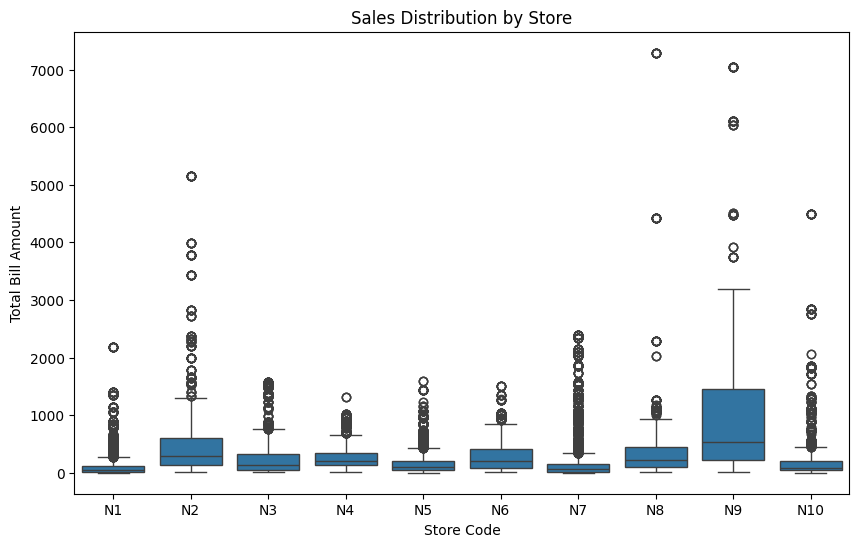

In [31]:

# Plot the distribution of sales for each store
plt.figure(figsize=(10, 6))
sns.boxplot(x='STORECODE', y='BILL_AMT', data=df)
plt.title('Sales Distribution by Store')
plt.xlabel('Store Code')
plt.ylabel('Total Bill Amount')
plt.show()

Sales Trends Over Time

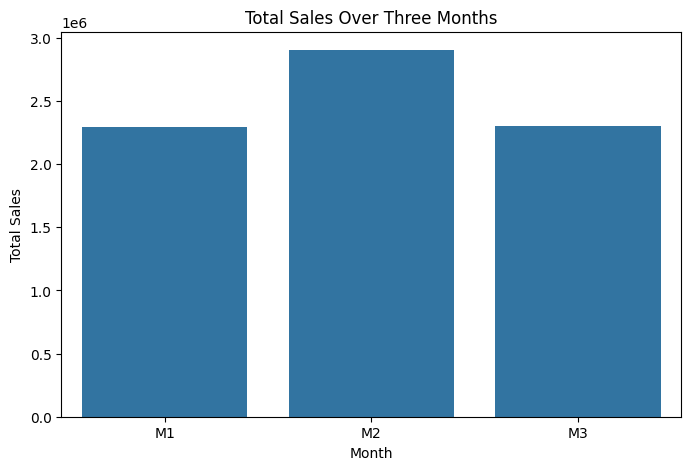

In [32]:

# Plot the total sales over the three months
monthly_sales = df.groupby('MONTH')['BILL_AMT'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='MONTH', y='BILL_AMT', data=monthly_sales)
plt.title('Total Sales Over Three Months')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

Daily Sales by store

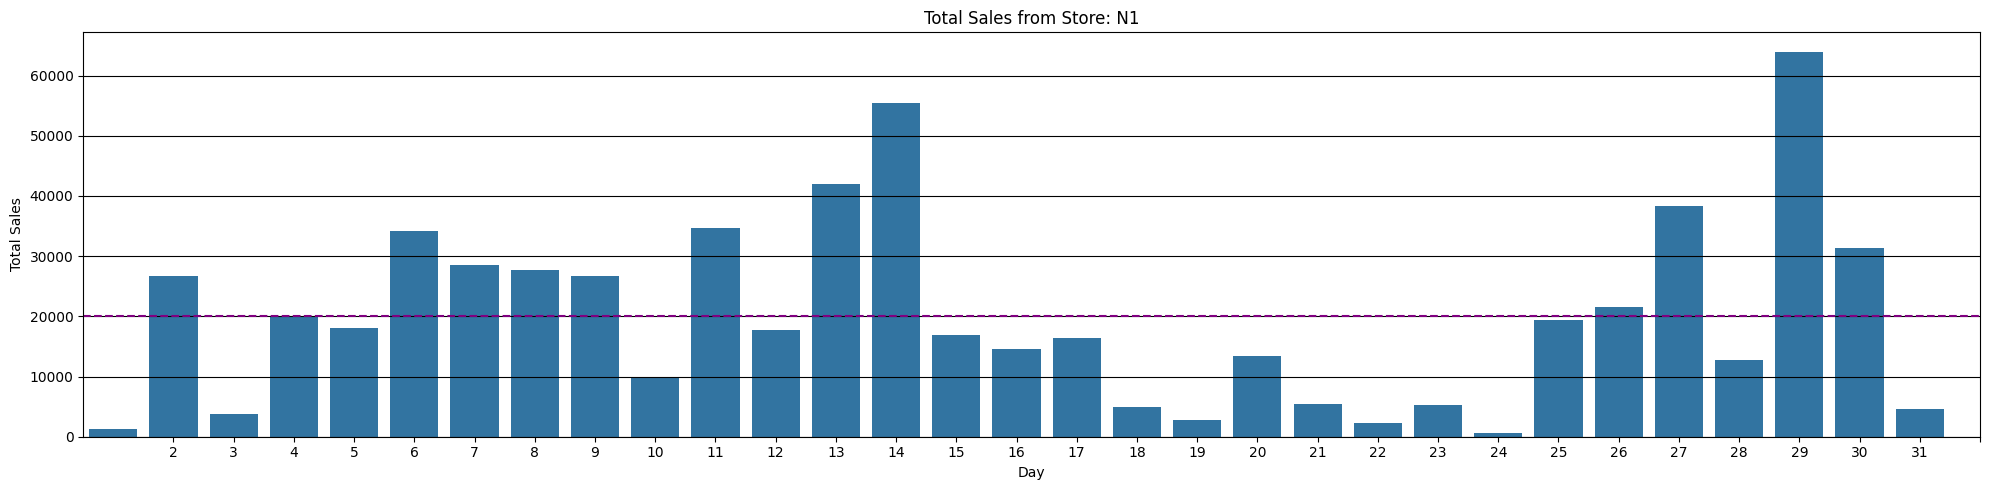

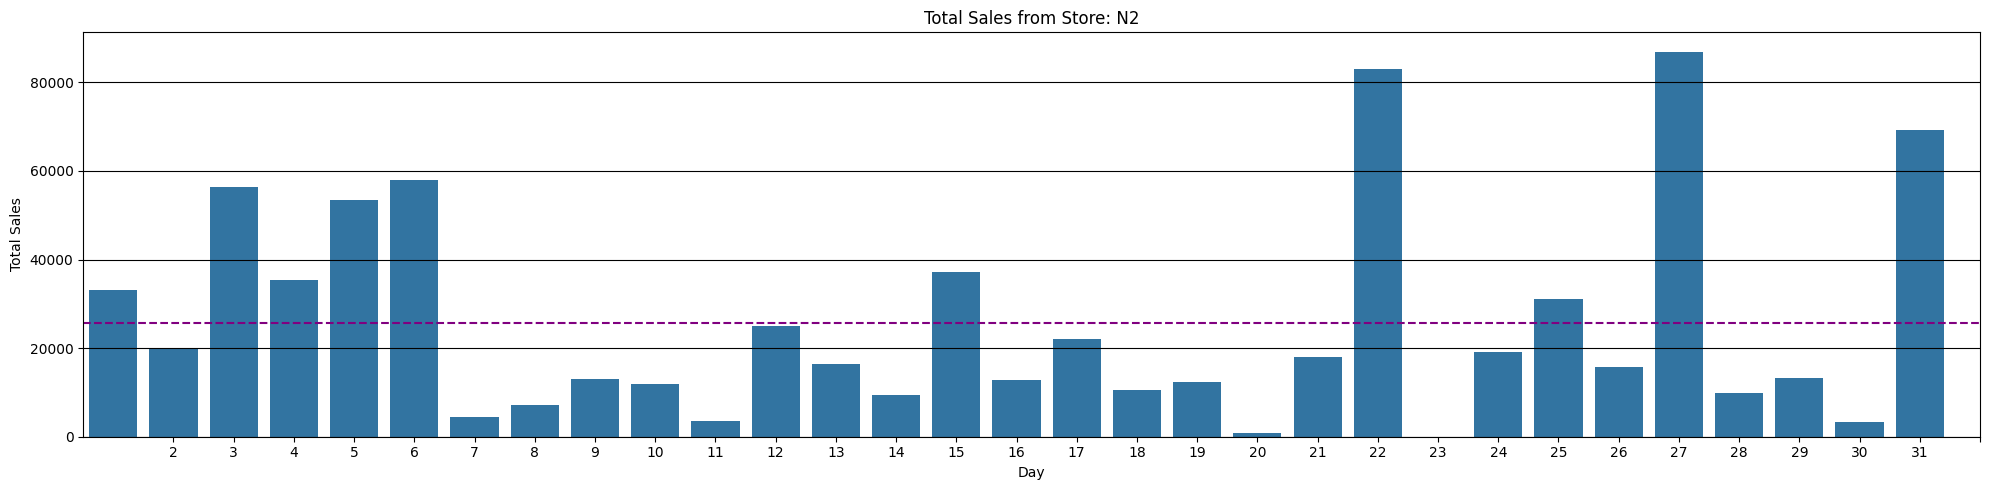

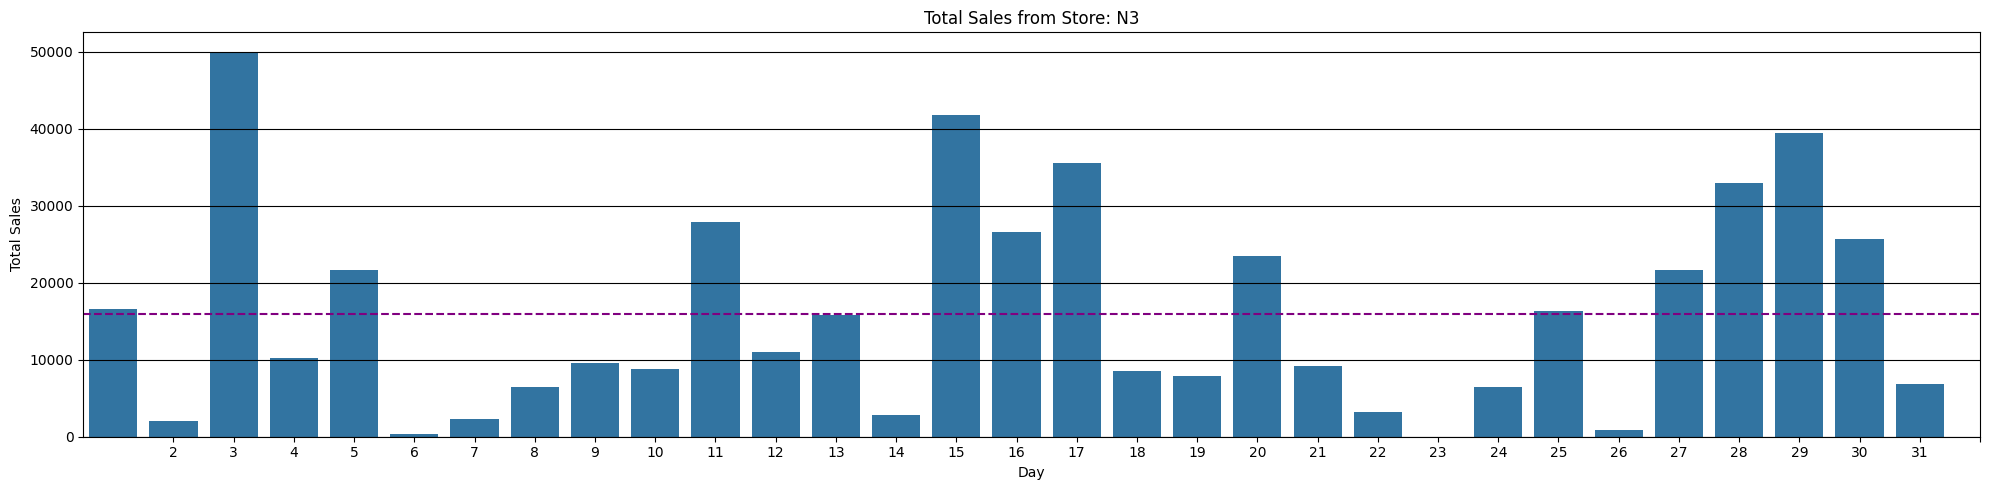

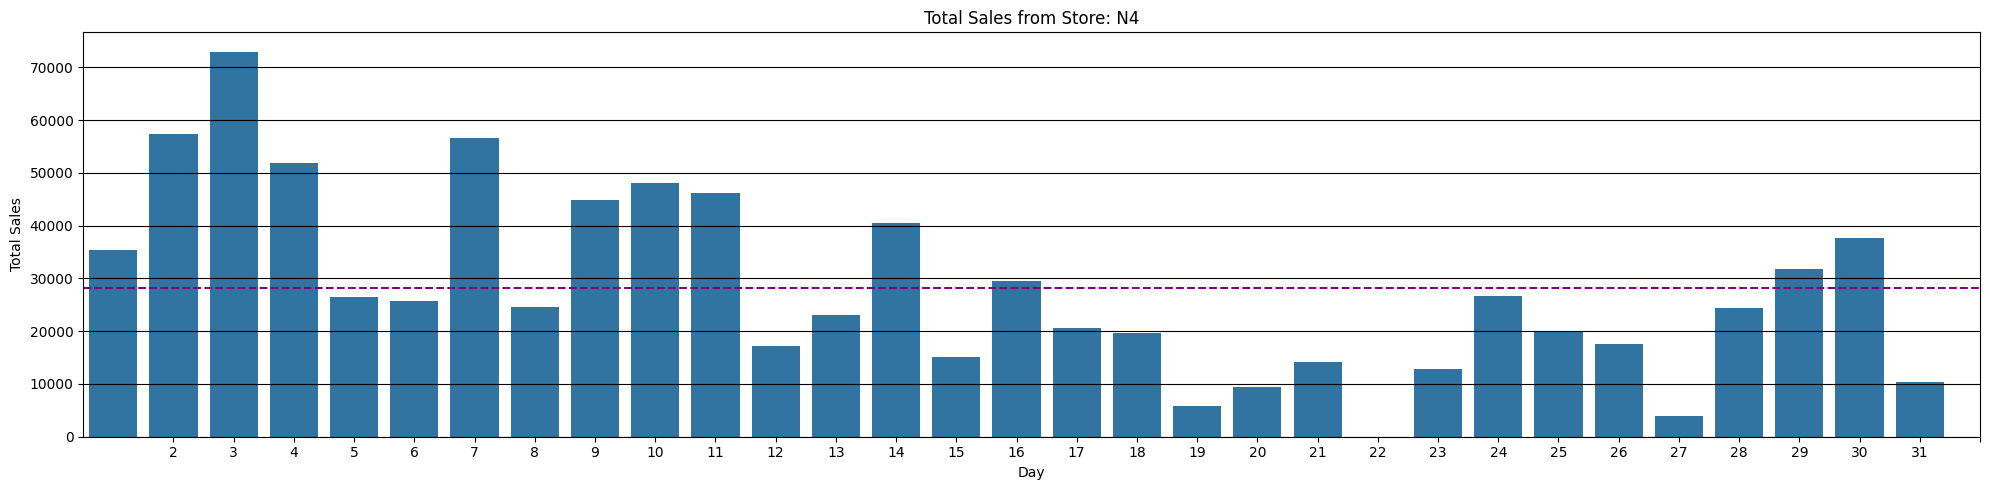

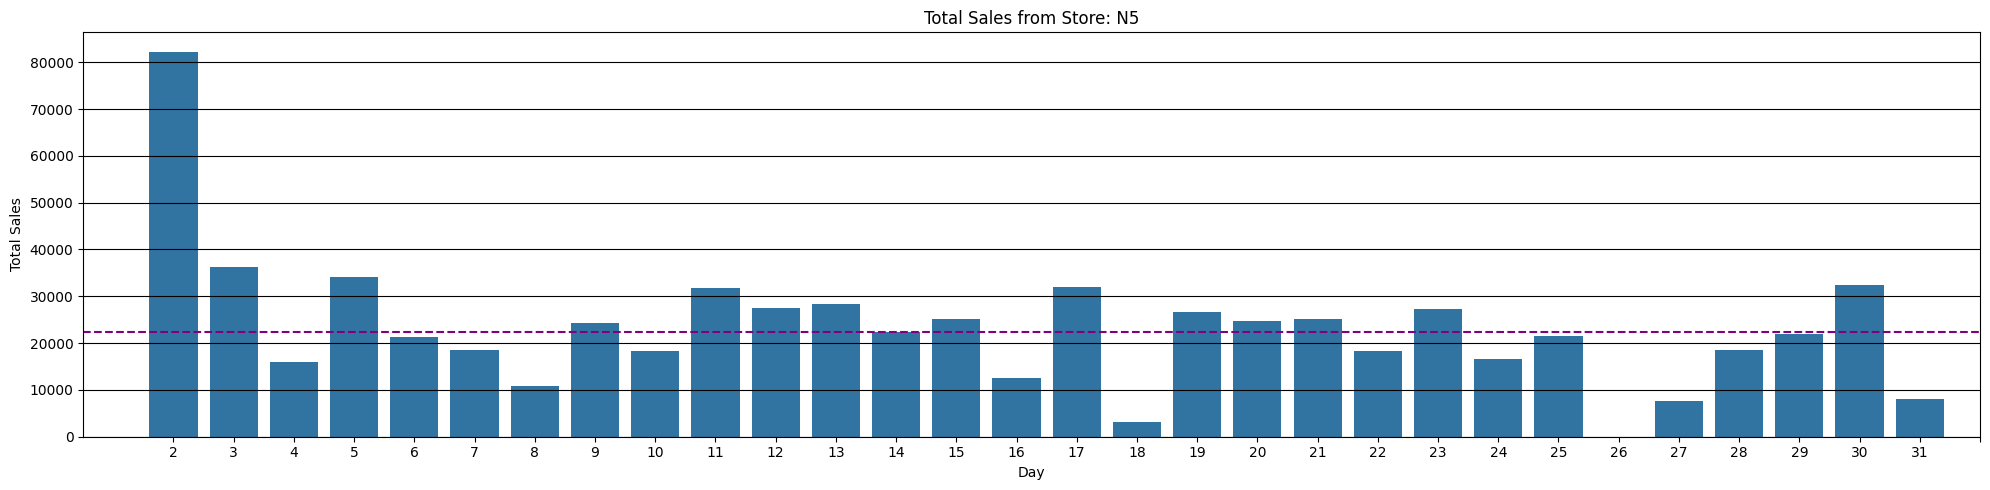

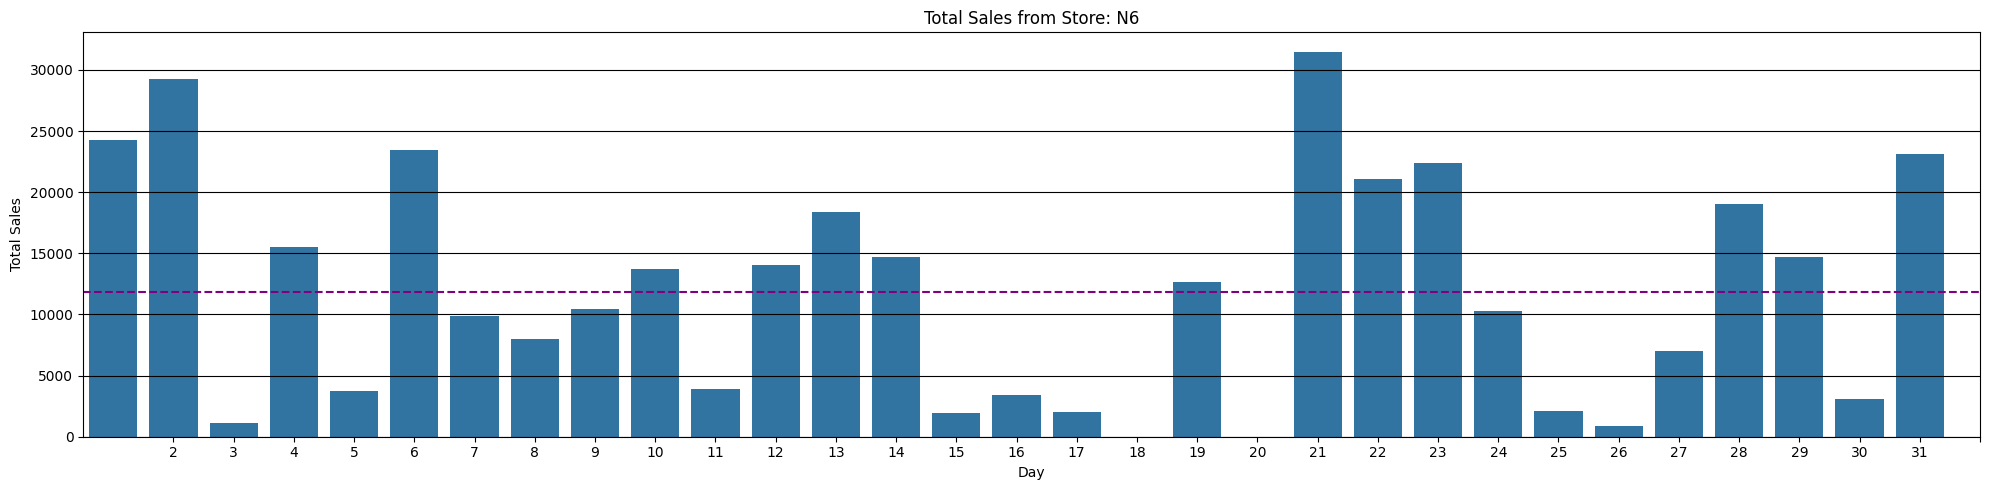

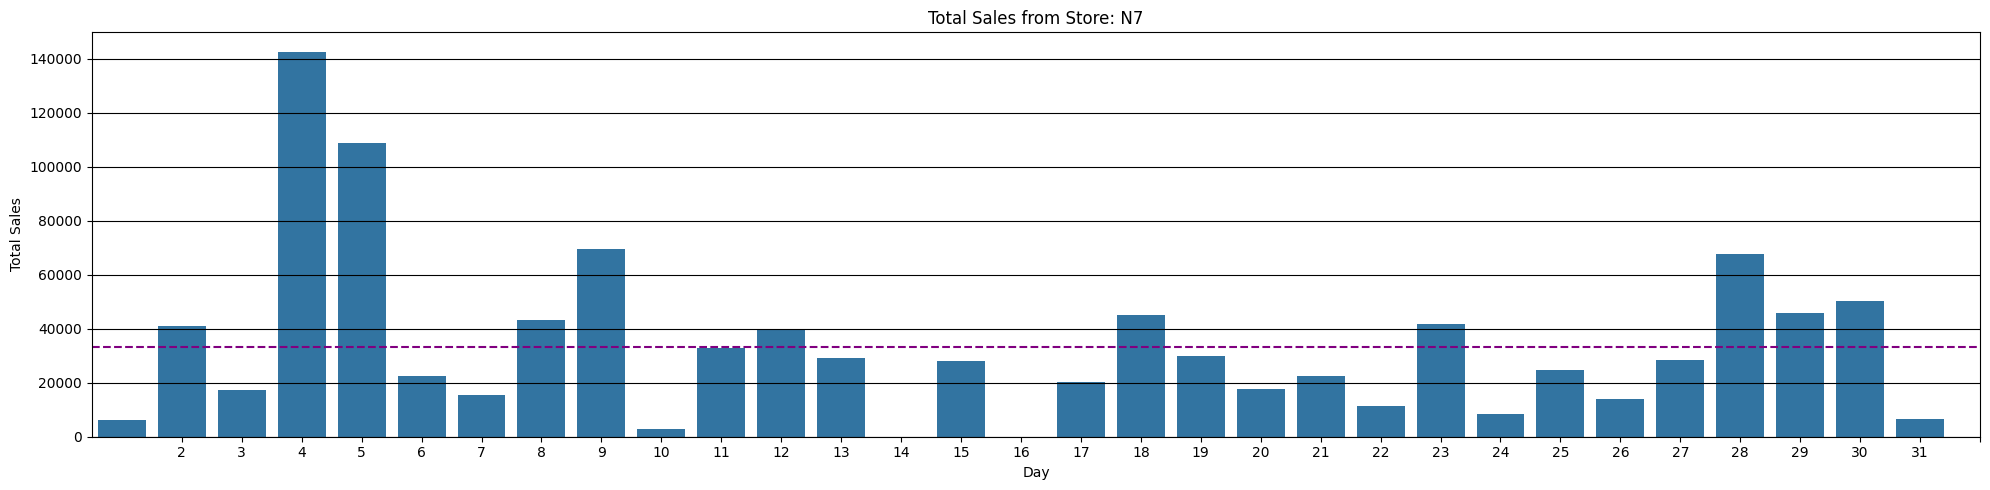

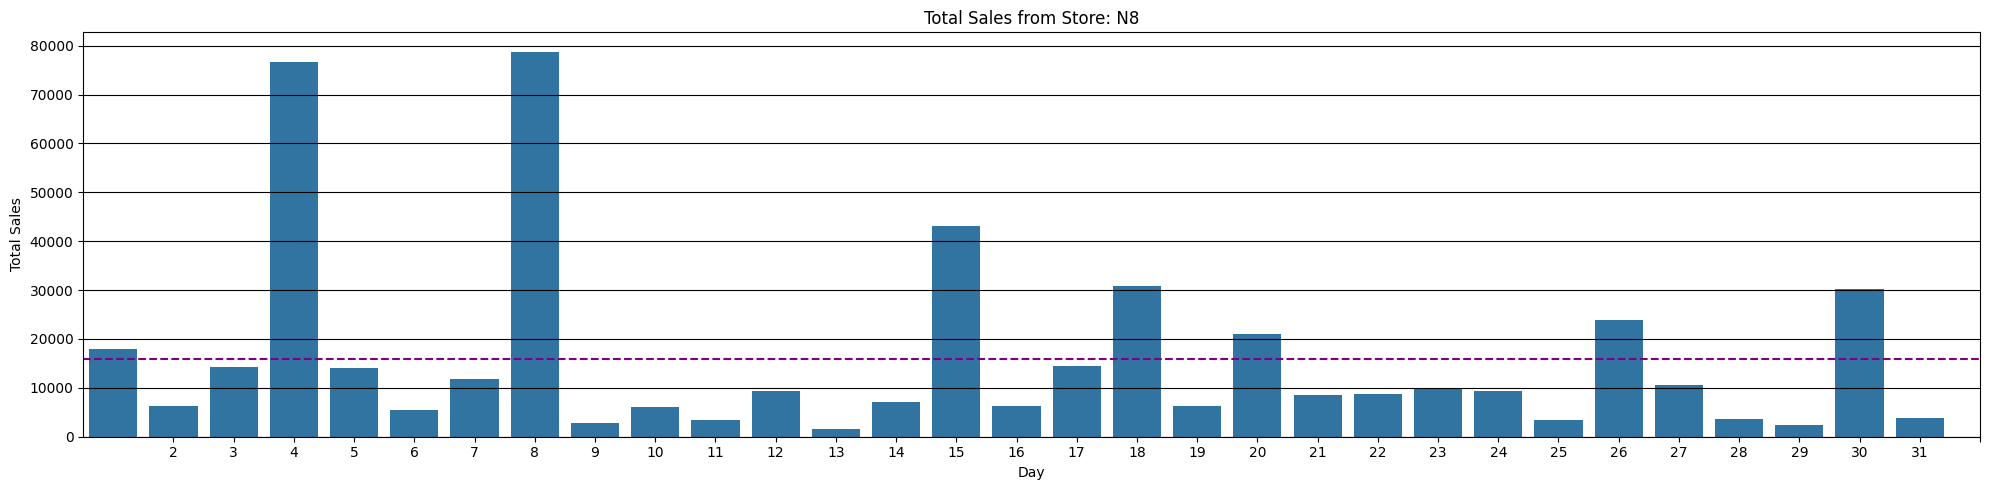

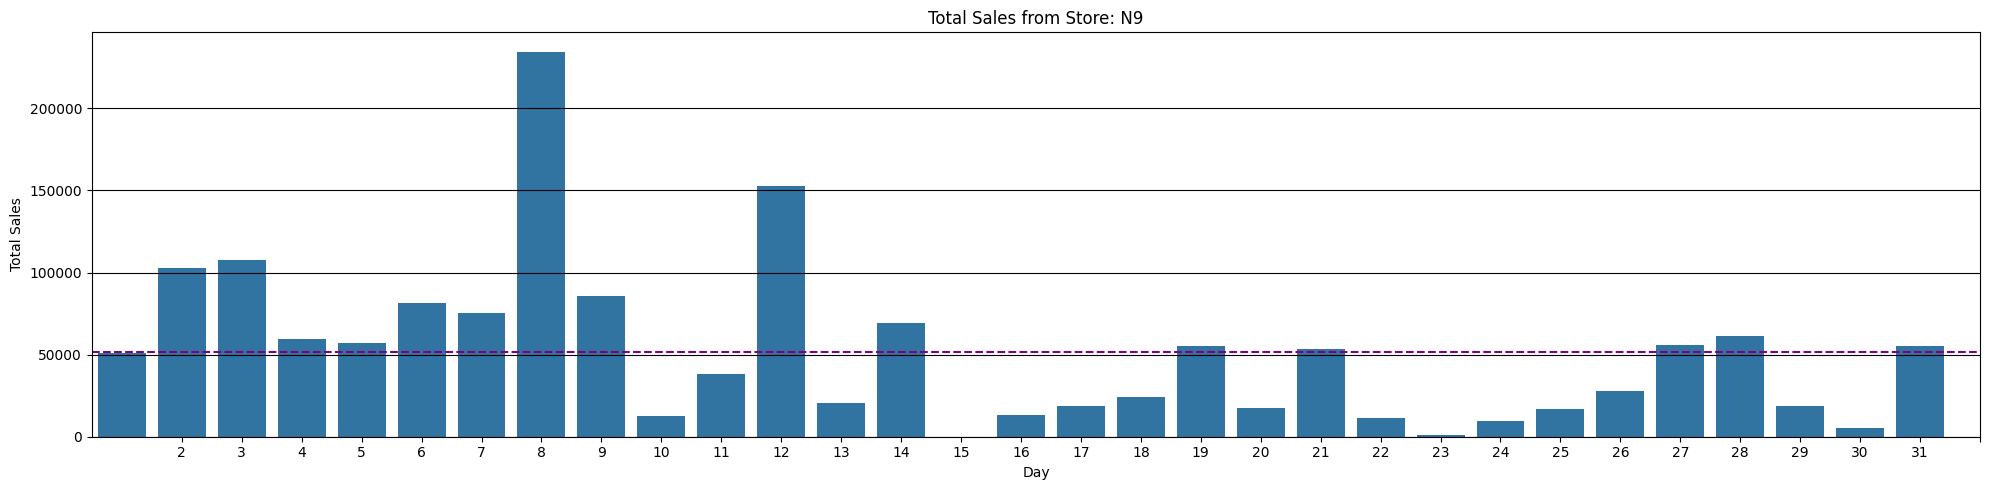

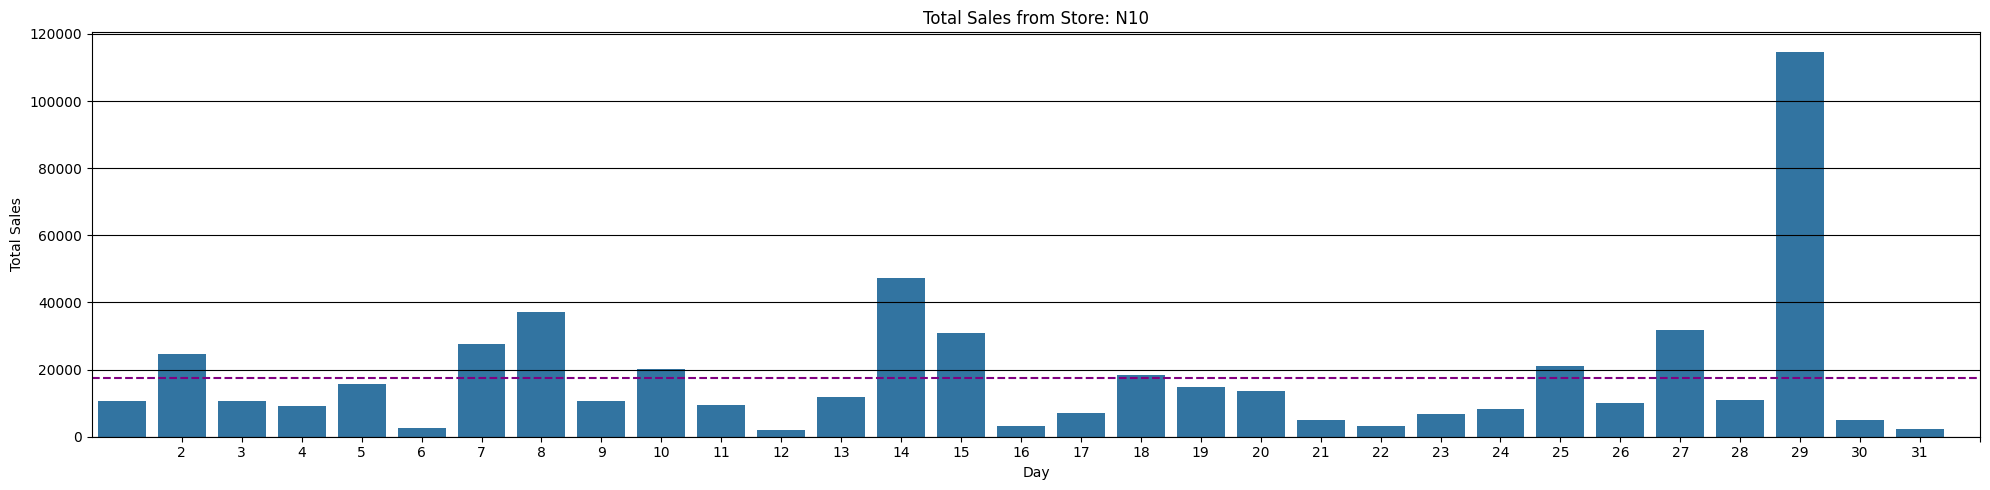

In [33]:

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate daily sales by store
daily_sales_by_store = df.groupby(['STORECODE', 'DAY'])['BILL_AMT'].sum()

# Plot daily sales by store with individual plots for each store
for store_code in df['STORECODE'].unique():
    store_sales = daily_sales_by_store.loc[store_code]

    # Fill in missing days with 0 sales
    store_sales = store_sales.reindex(range(1, 32), fill_value=0)

    plt.figure(figsize=(20, 5))
    sns.barplot(x=store_sales.index, y=store_sales.values)
    plt.axhline(store_sales.mean(), color='purple', linestyle='--')
    plt.title("Total Sales from Store: " + store_code)
    plt.xlabel("Day")
    plt.ylabel("Total Sales")
    plt.grid(axis='y', color='black')
    plt.xticks(range(1, 32))
    plt.tight_layout()
    plt.show()

Which category sells the most items in general and by store?

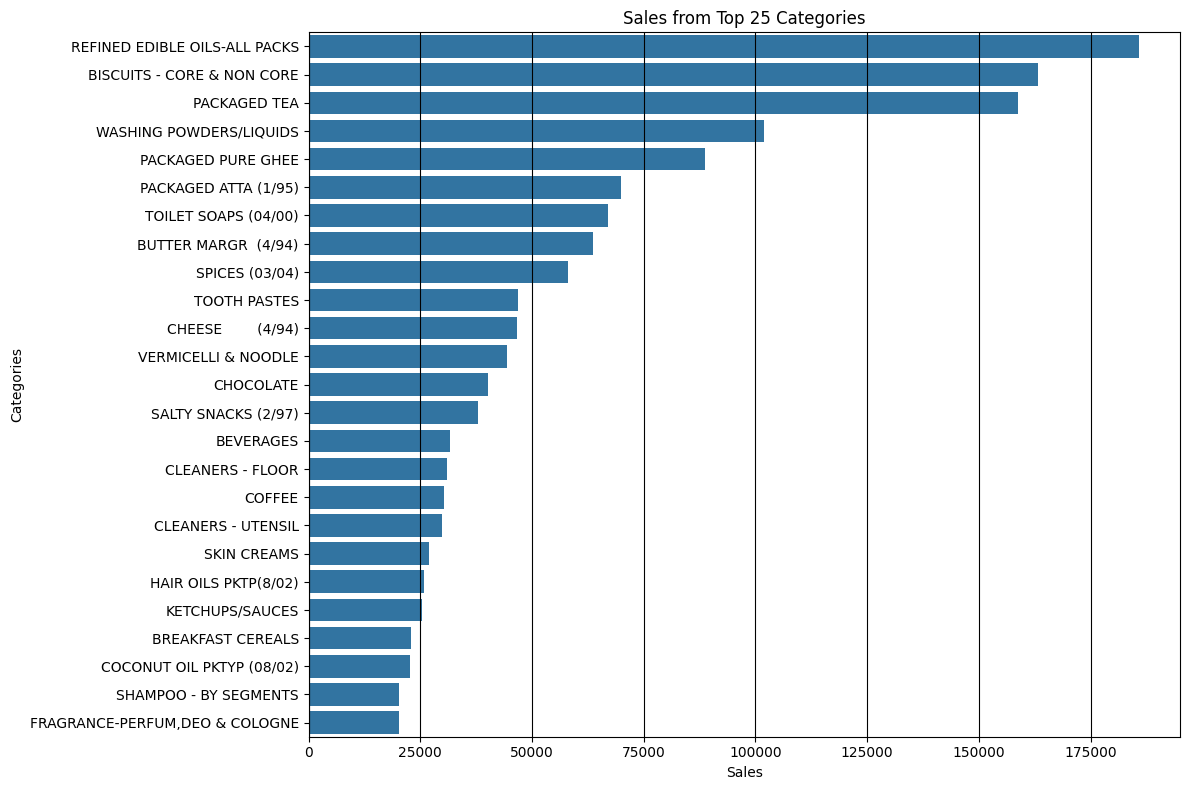

In [34]:

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total sales for each category
top_items_sales = df.groupby('GRP').sum().sort_values("VALUE", ascending=False)[['QTY', 'PRICE', 'VALUE']].head(25)

# Plot sales from top 25 categories
plt.figure(figsize=(12, 8))
sns.barplot(x='VALUE', y=top_items_sales.index, data=top_items_sales, orient='h')
plt.title("Sales from Top 25 Categories")
plt.xlabel("Sales")
plt.ylabel("Categories")
plt.grid(axis='x', color='black')
plt.tight_layout()
plt.show()

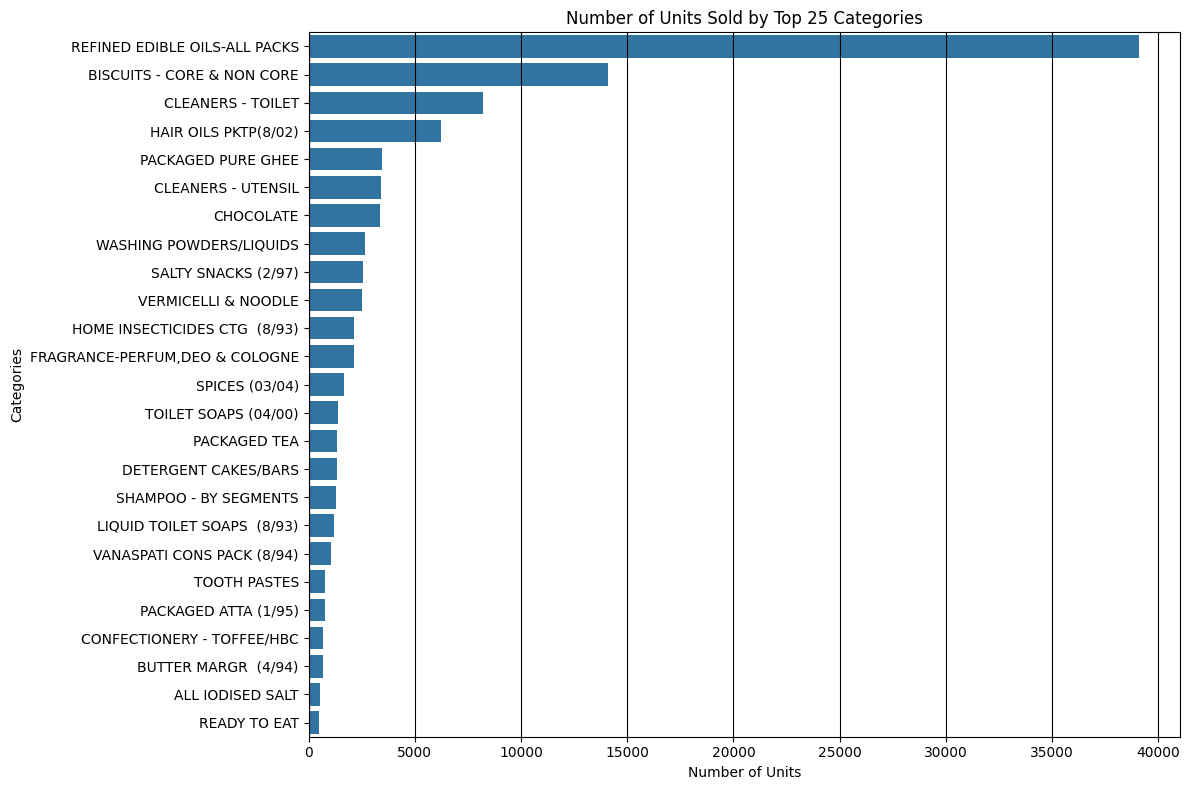

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total quantity sold for each category
top_items = df.groupby('GRP').sum().sort_values("QTY", ascending=False)[['QTY', 'PRICE']].head(25)

# Plot number of units sold by top 25 categories
plt.figure(figsize=(12, 8))
sns.barplot(x='QTY', y=top_items.index, data=top_items, orient='h')
plt.title("Number of Units Sold by Top 25 Categories")
plt.xlabel("Number of Units")
plt.ylabel("Categories")
plt.grid(axis='x', color='black')
plt.tight_layout()
plt.show()

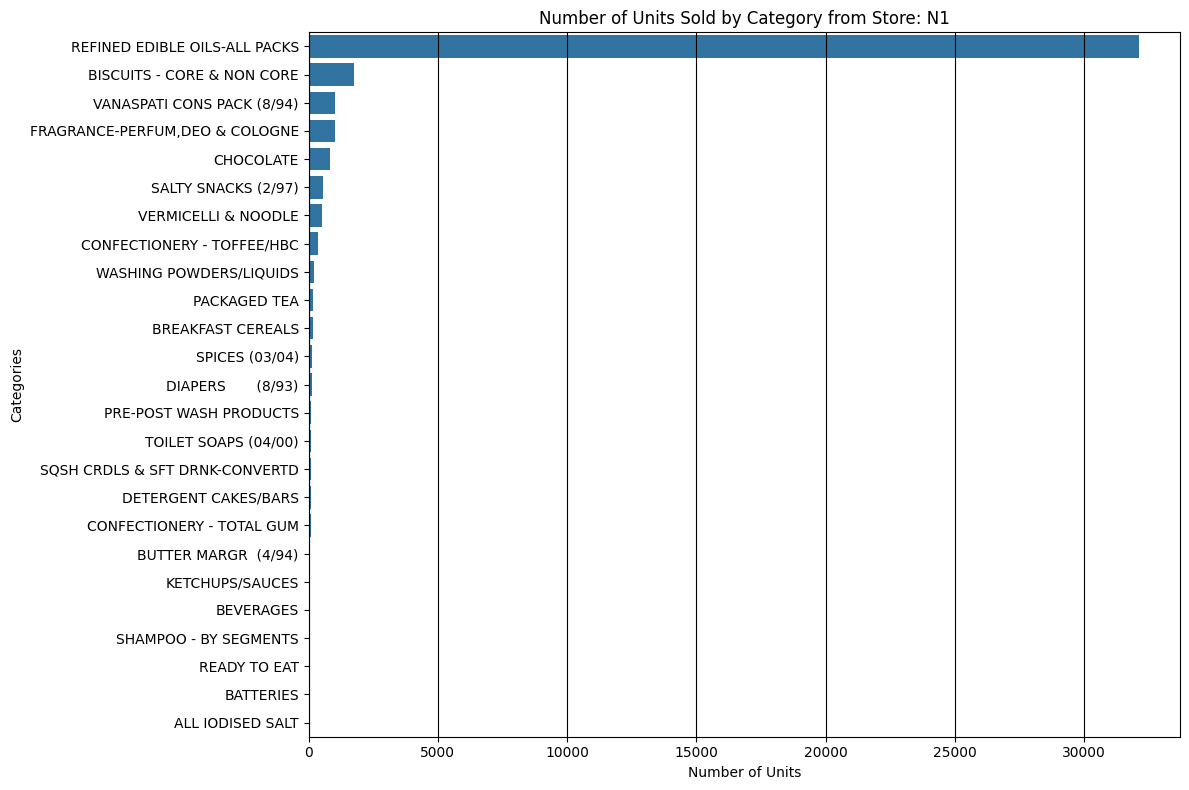

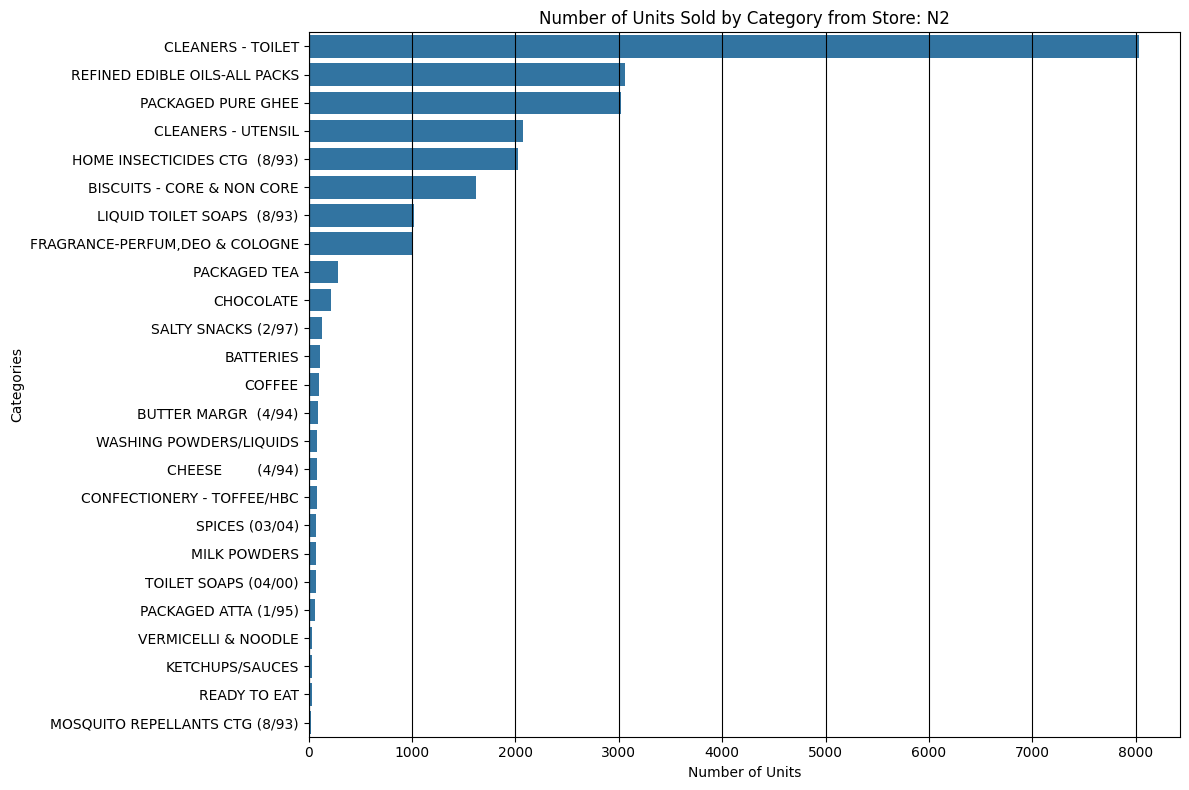

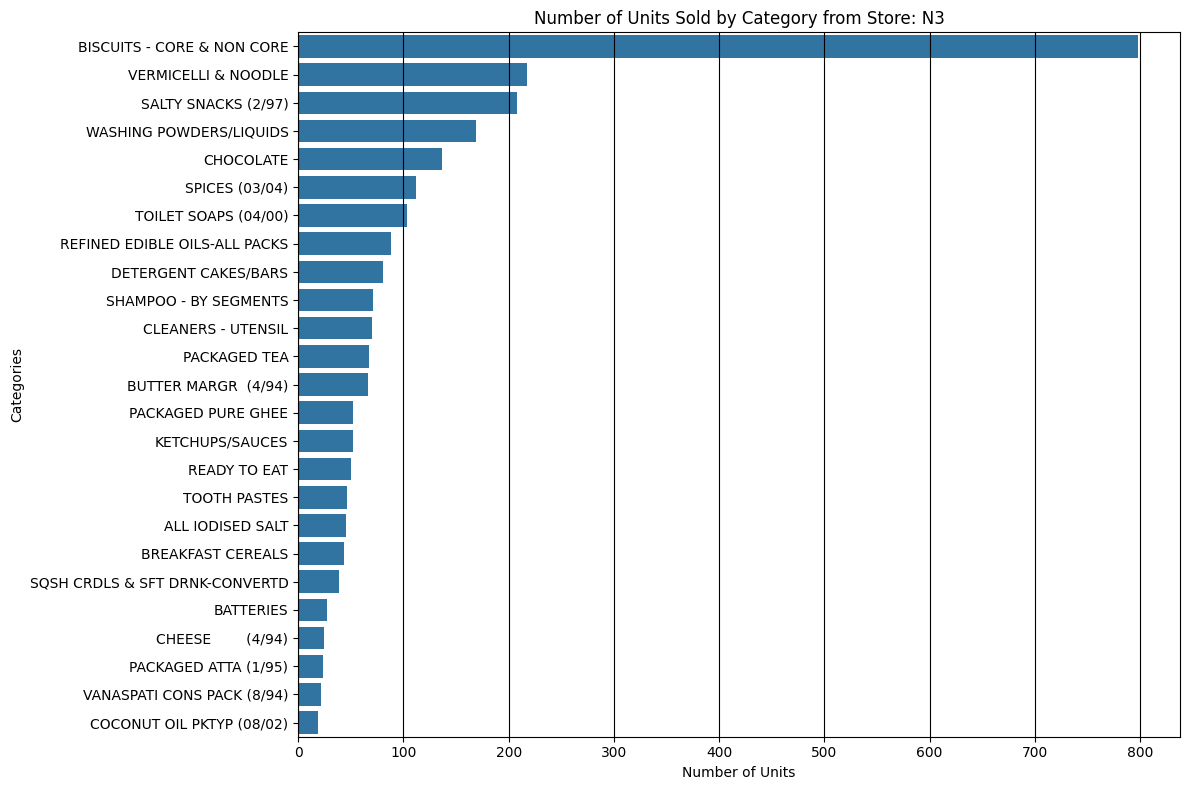

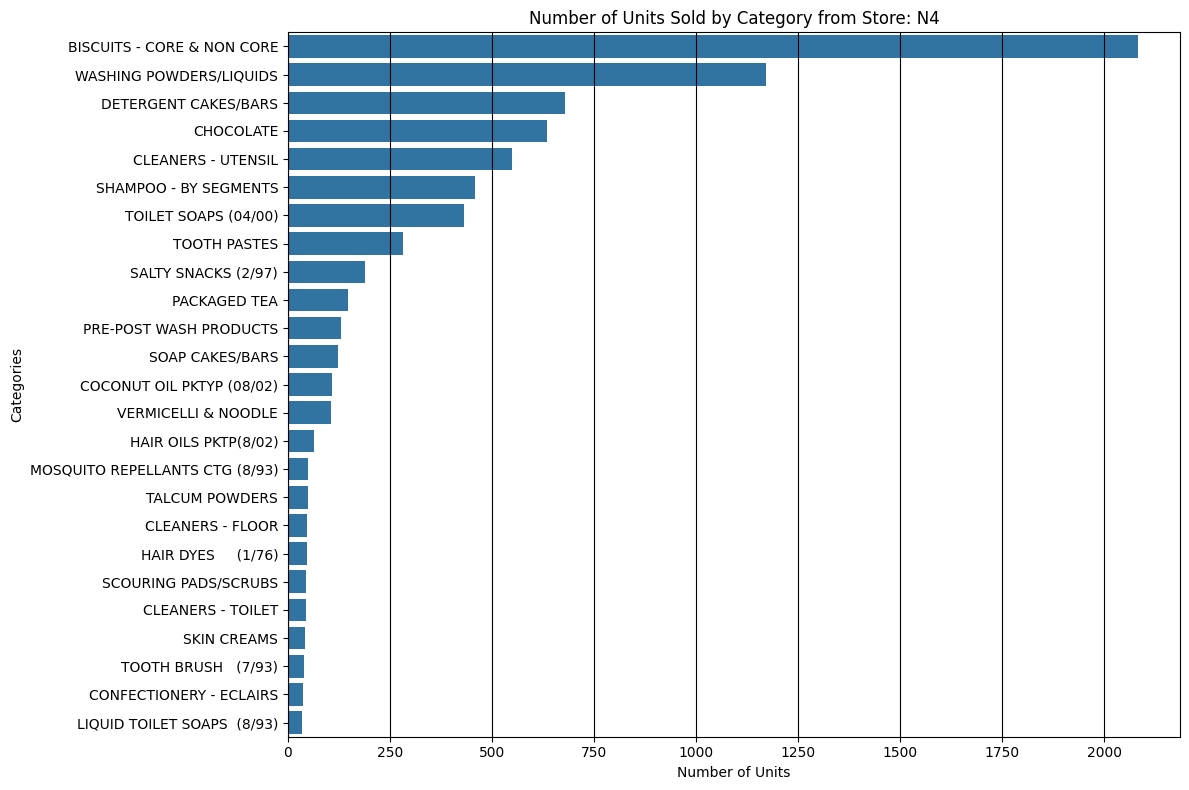

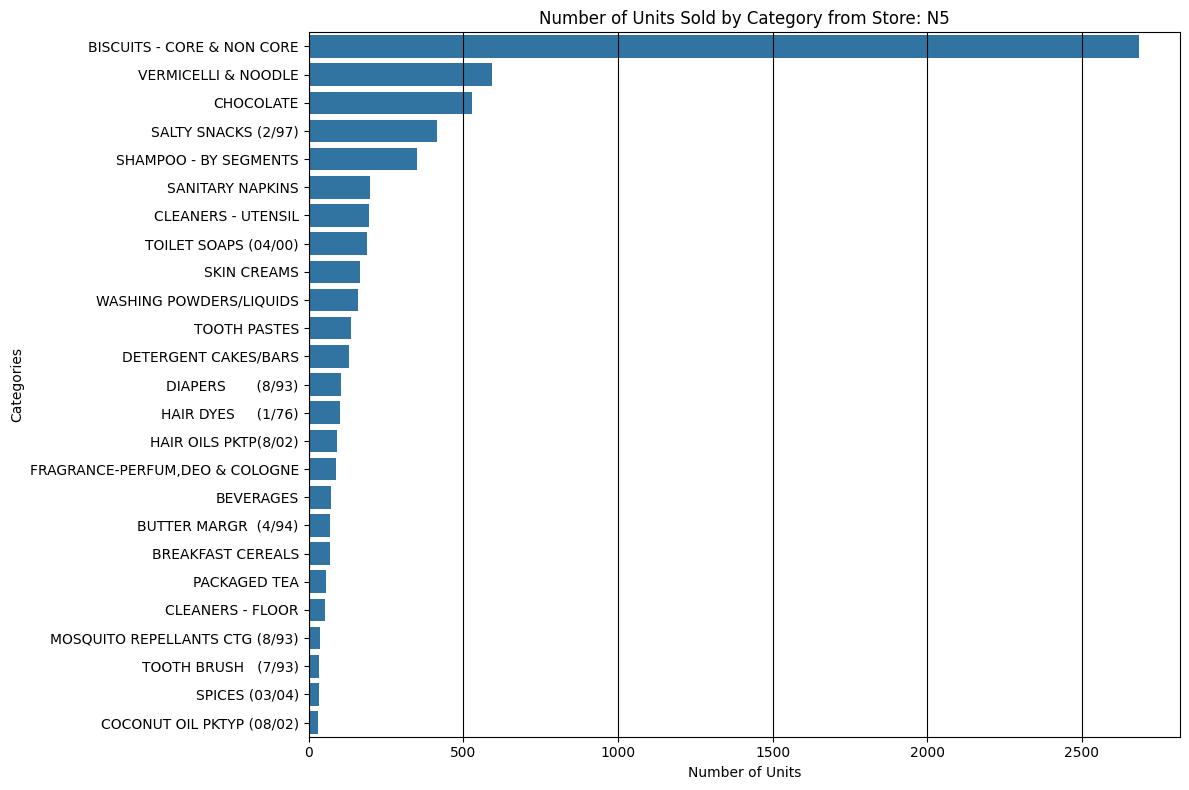

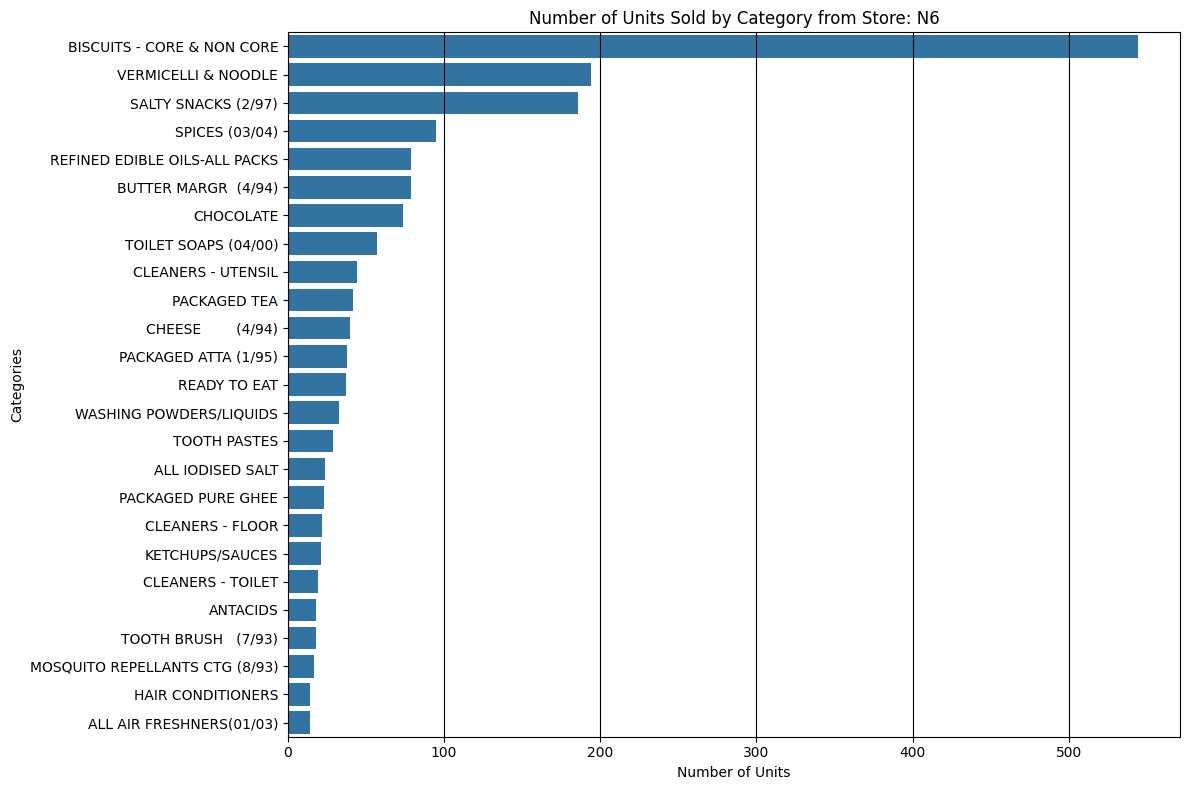

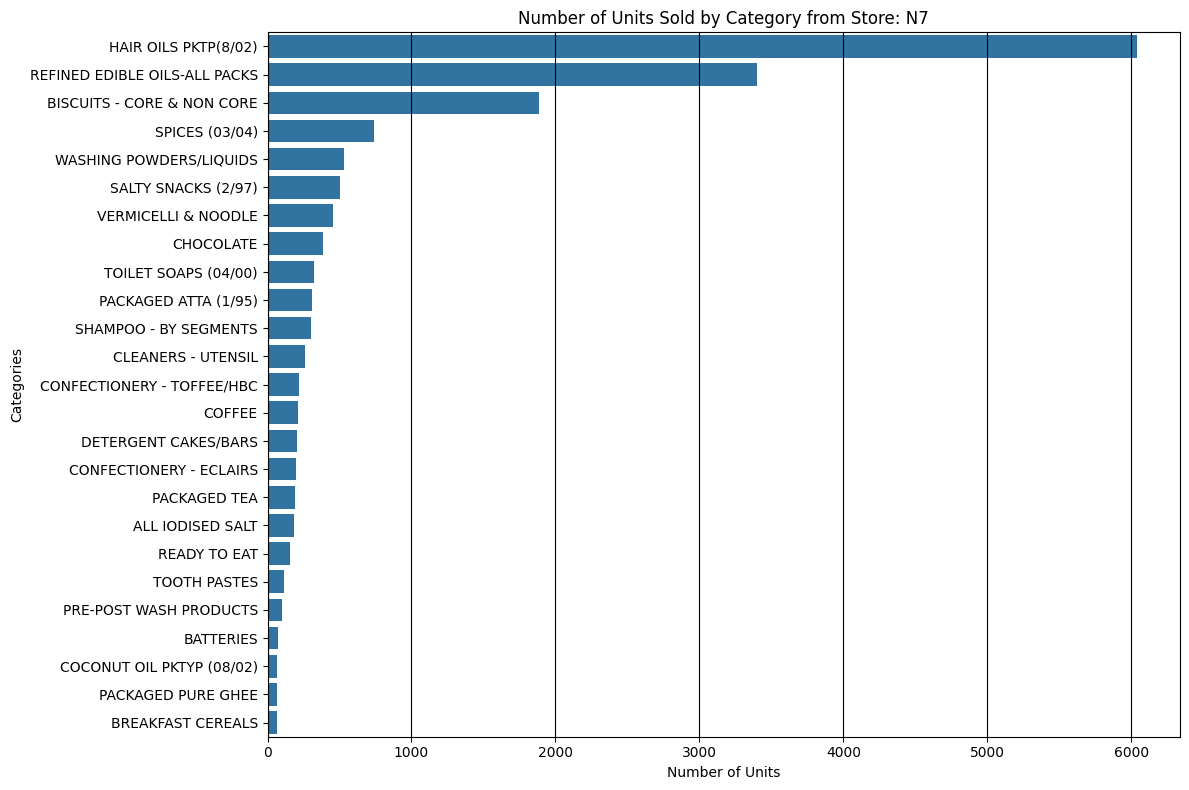

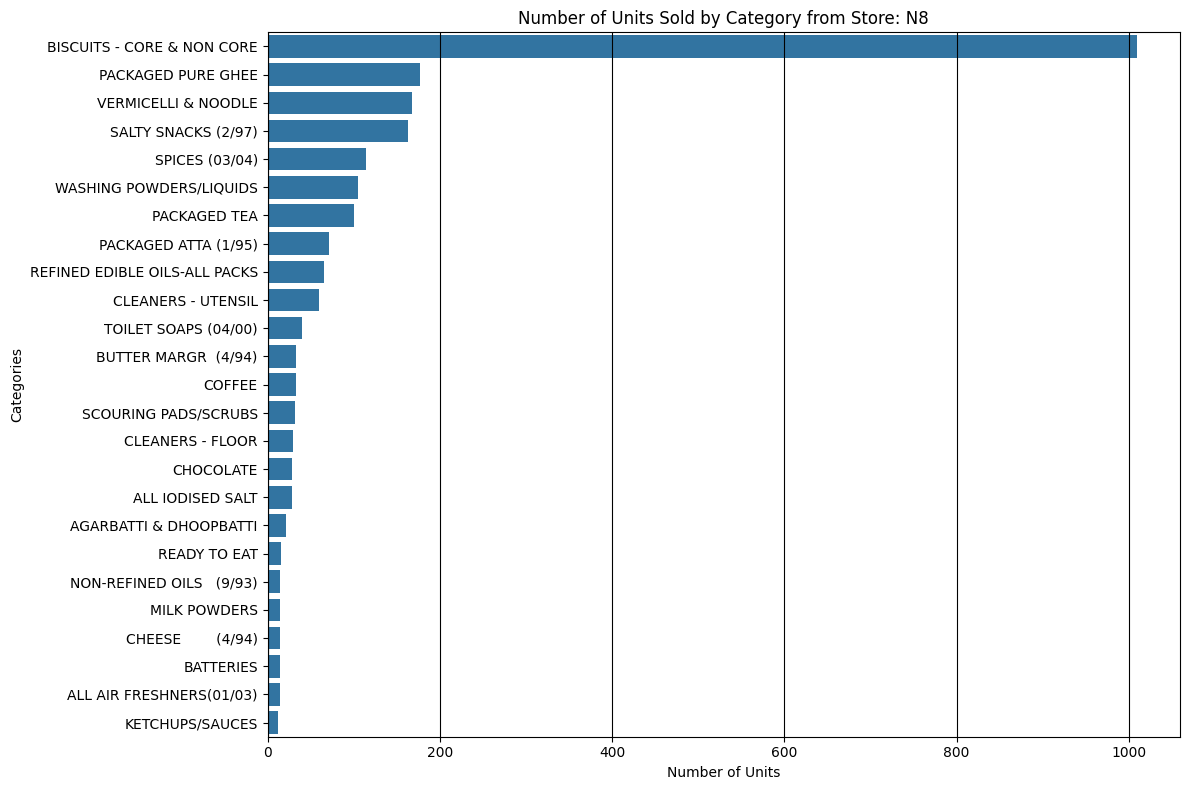

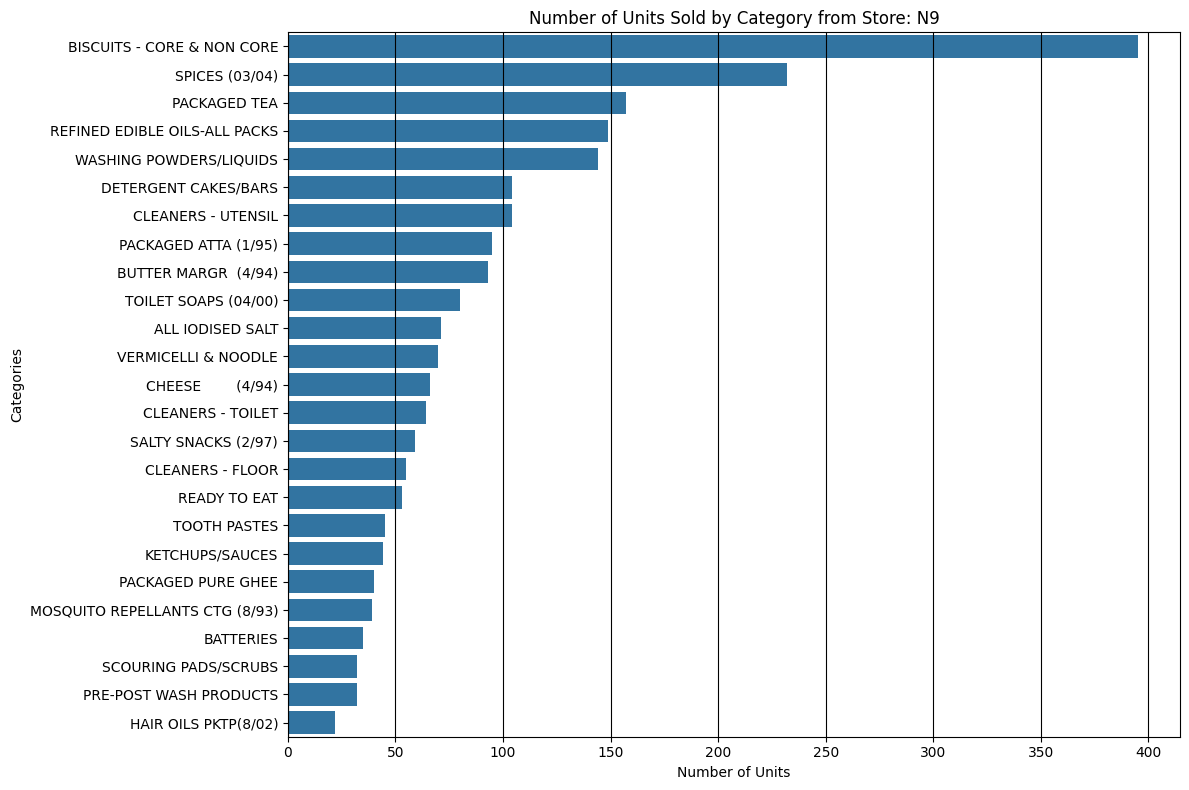

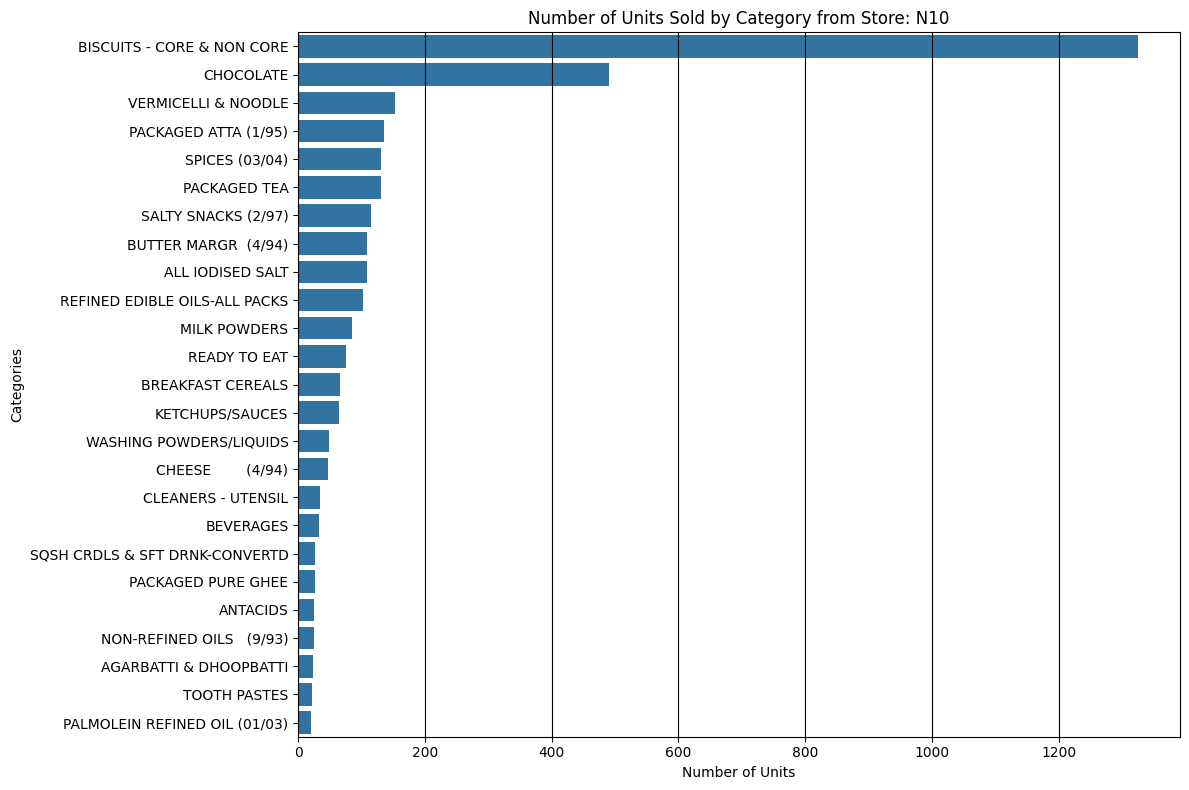

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate over unique store codes
for store_code in df['STORECODE'].unique():
    # Calculate top 25 categories by quantity sold for the current store
    top_categories_by_quantity = df.loc[df['STORECODE'] == store_code].groupby("GRP").sum().sort_values("QTY", ascending=False)[["VALUE", "QTY"]].head(25)

    # Plot top 25 categories by quantity sold for the current store
    plt.figure(figsize=(12, 8))
    sns.barplot(x='QTY', y=top_categories_by_quantity.index, data=top_categories_by_quantity, orient='h')
    plt.title("Number of Units Sold by Category from Store: " + store_code)
    plt.xlabel("Number of Units")
    plt.ylabel("Categories")
    plt.grid(axis='x', color='black')
    plt.tight_layout()
    plt.show()


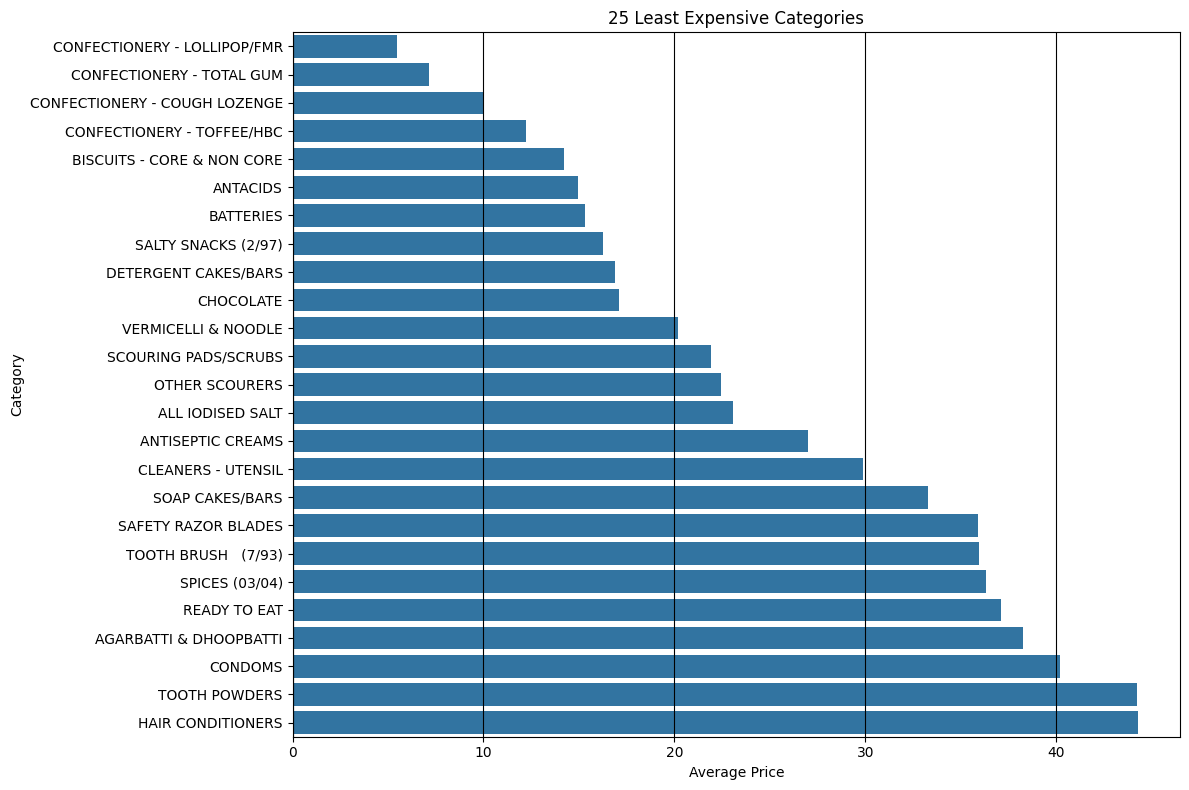

In [37]:


# Convert numeric columns to appropriate data type if needed
df['PRICE'] = pd.to_numeric(df['PRICE'], errors='coerce')
df['QTY'] = pd.to_numeric(df['QTY'], errors='coerce')

# Group by "GRP" and calculate the mean of numeric columns
grp_per_price_2 = df.groupby("GRP").agg({'PRICE': 'mean', 'QTY': 'mean'})

# Sort by average price in ascending order and select top 25
grp_per_price_2 = grp_per_price_2.sort_values("PRICE", ascending=True).head(25)

# Plot the 25 least expensive categories
plt.figure(figsize=(12, 8))
sns.barplot(x='PRICE', y=grp_per_price_2.index, data=grp_per_price_2.reset_index(), orient='h')
plt.title("25 Least Expensive Categories")
plt.xlabel("Average Price")
plt.ylabel("Category")
plt.grid(axis='x', color='black')
plt.tight_layout()
plt.show()

BRAND ANALYSIS BY SALES

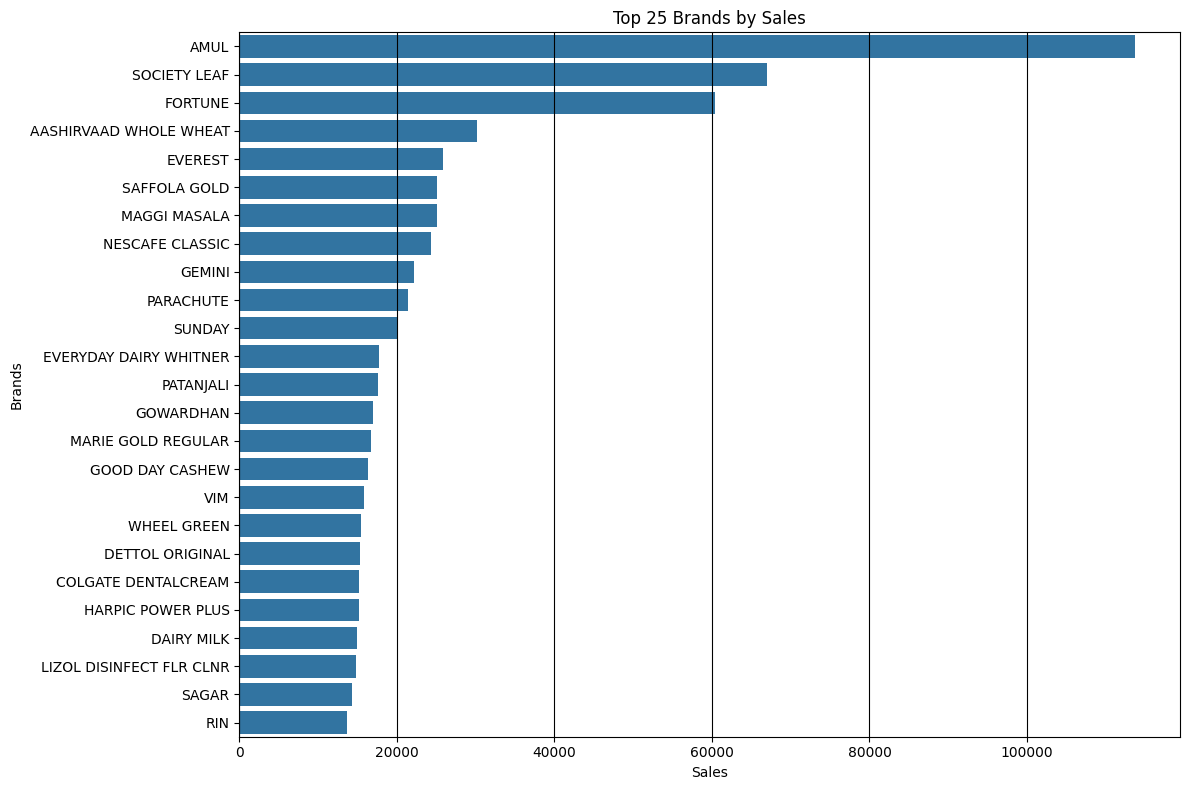

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'BRD' and sum the values
brands_sales = df.groupby('BRD').sum()

# Sort the values by sales in descending order and select the top 25
top_brands_sales = brands_sales.sort_values('VALUE', ascending=False).head(25)

# Plot the top 25 brands by sales
plt.figure(figsize=(12, 8))
sns.barplot(x='VALUE', y=top_brands_sales.index, data=top_brands_sales, orient='h')
plt.title("Top 25 Brands by Sales")
plt.xlabel("Sales")
plt.ylabel("Brands")
plt.grid(axis='x', color='black')
plt.tight_layout()
plt.show()


Total units sold by each store

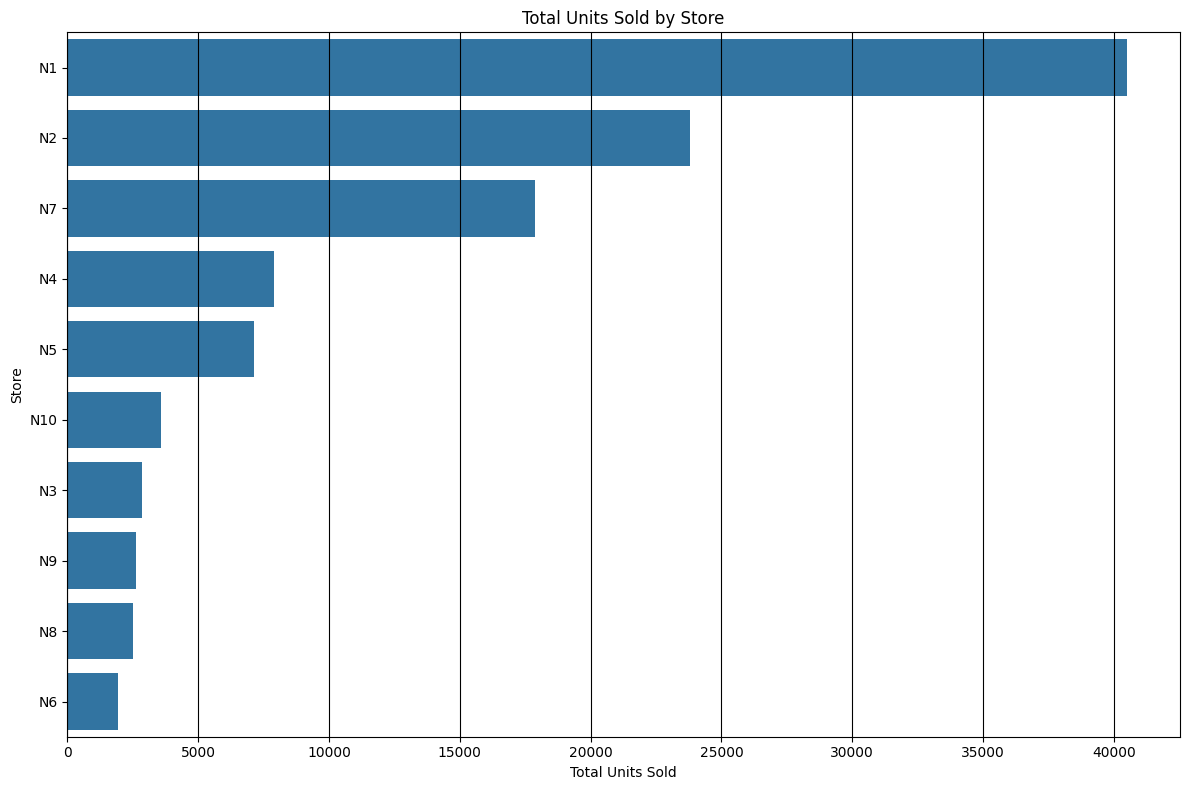

In [39]:

# Calculate total units sold by each store
units_sold_by_store = df.groupby('STORECODE')['QTY'].sum().sort_values(ascending=False)

# Plot the total units sold by each store
plt.figure(figsize=(12, 8))
sns.barplot(x=units_sold_by_store.values, y=units_sold_by_store.index, orient='h')
plt.title("Total Units Sold by Store")
plt.xlabel("Total Units Sold")
plt.ylabel("Store")
plt.grid(axis='x', color='black')
plt.tight_layout()
plt.show()

Brand analysis for each store
Top brands by sales

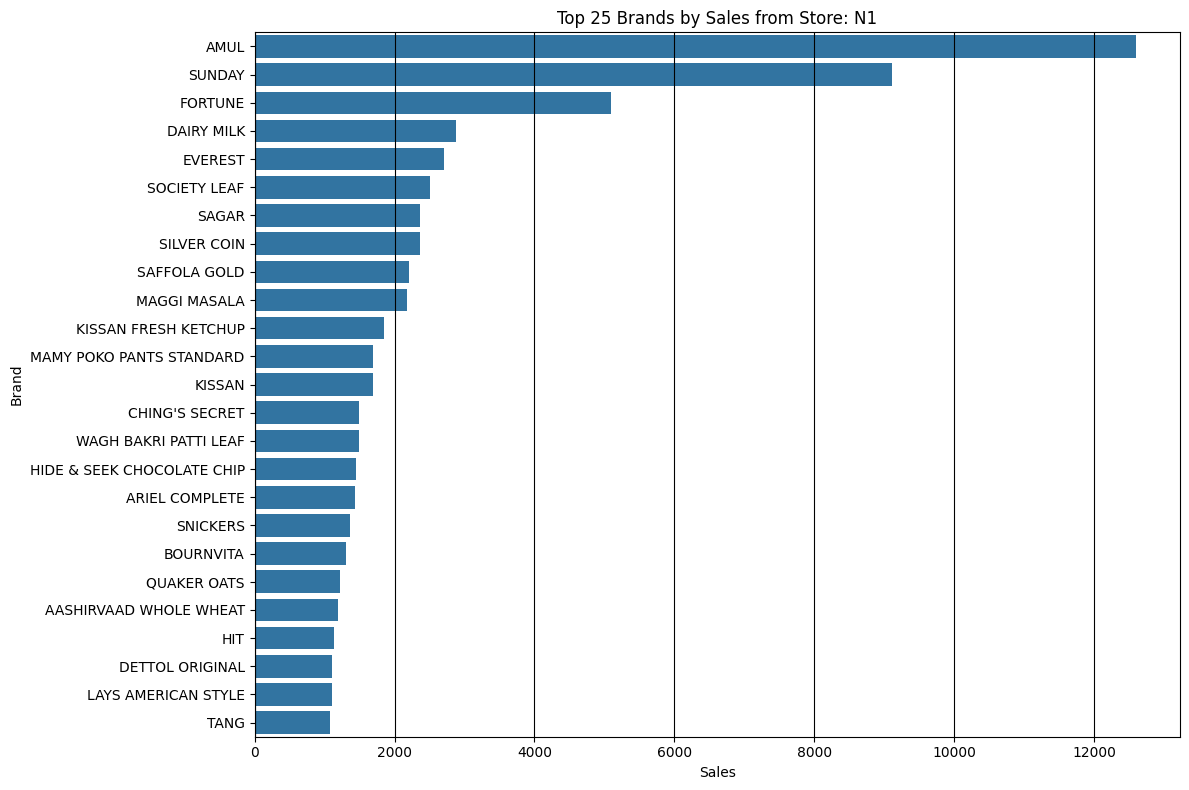

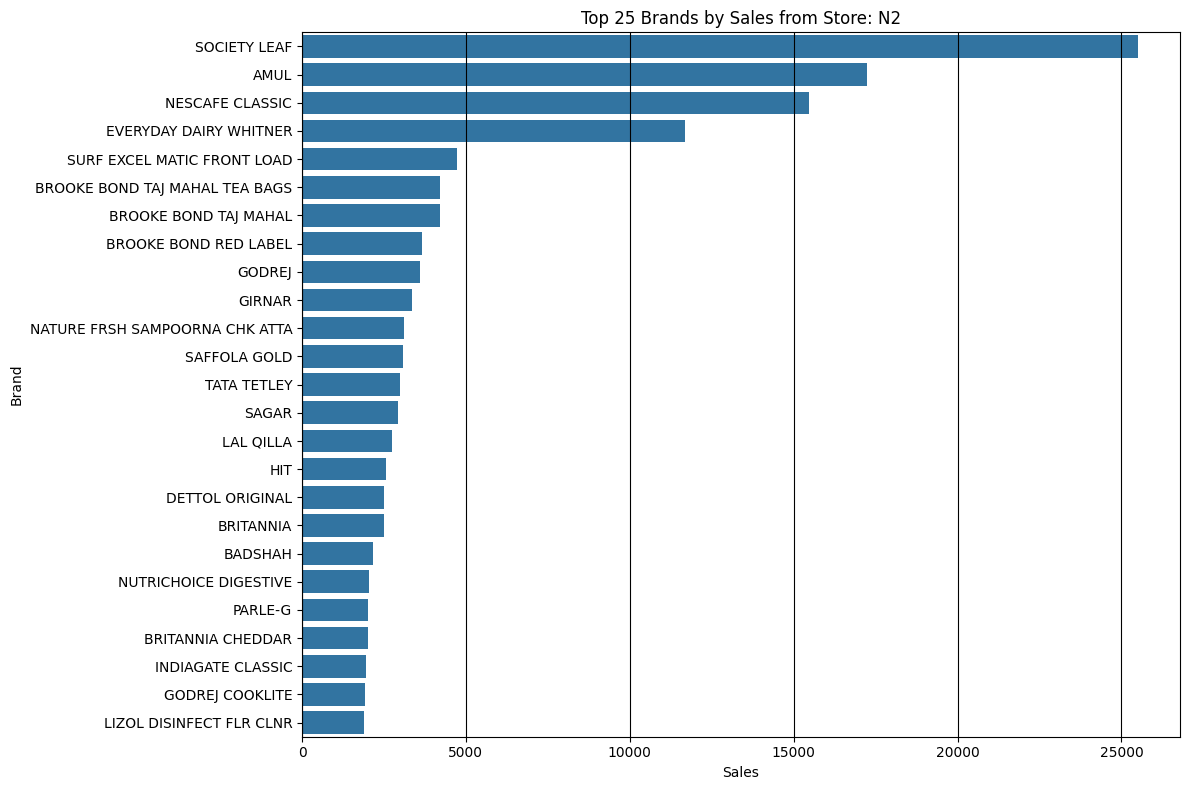

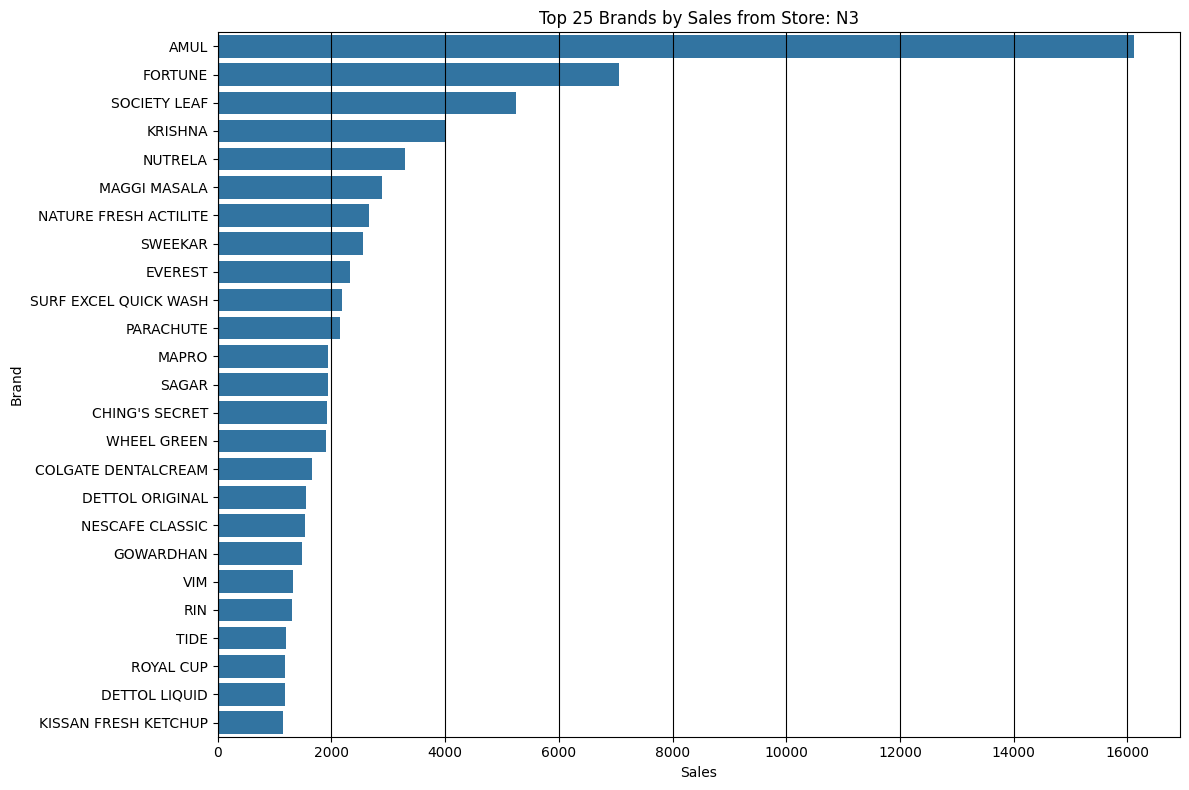

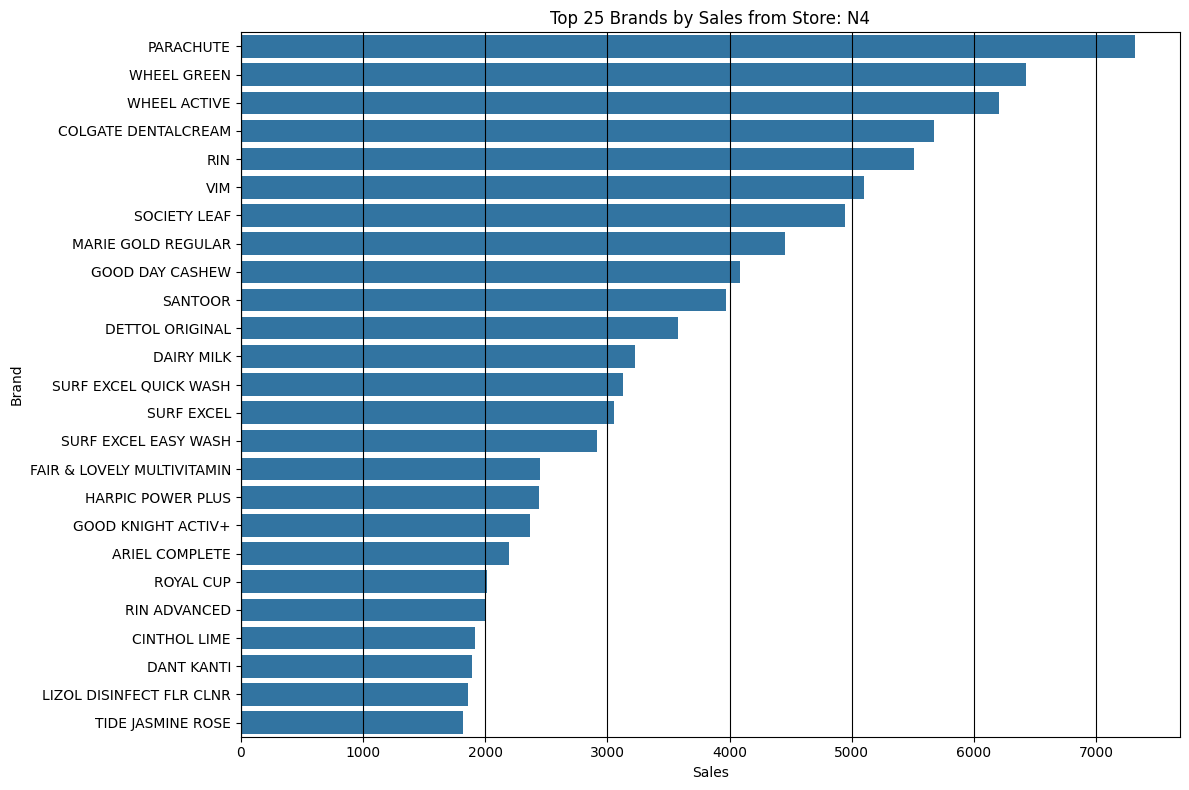

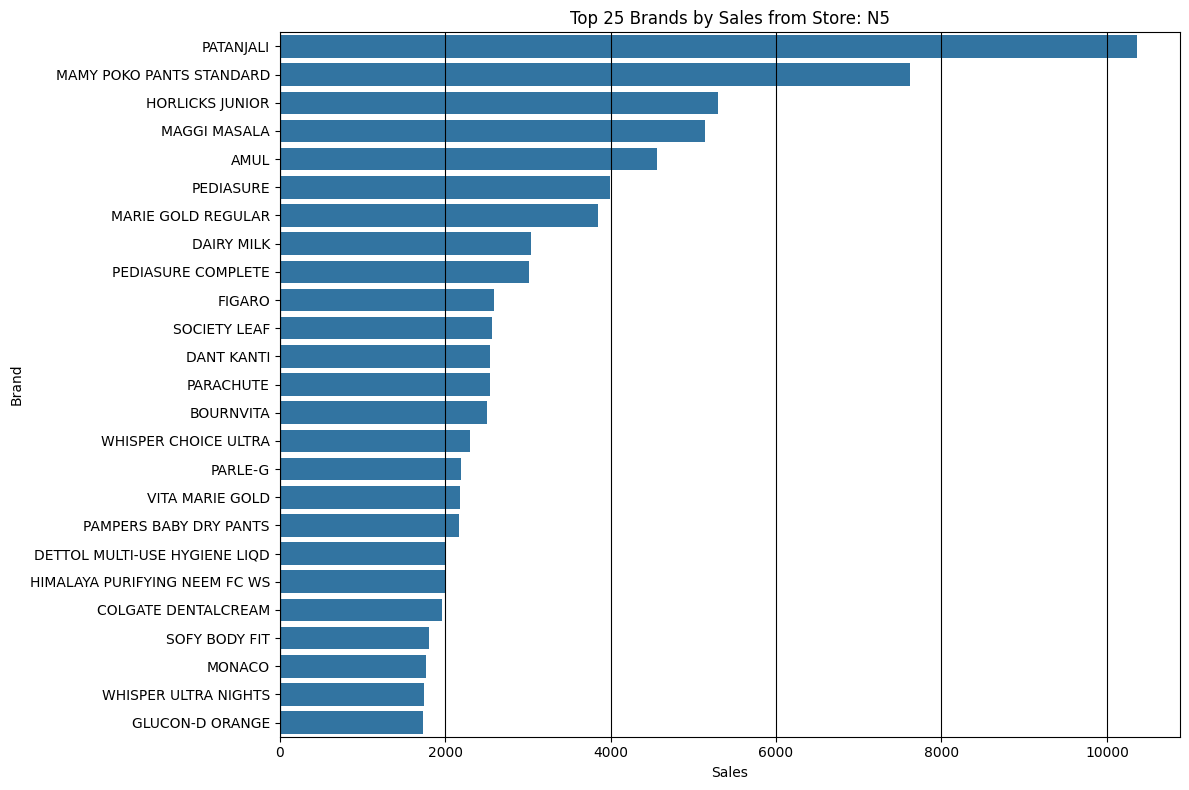

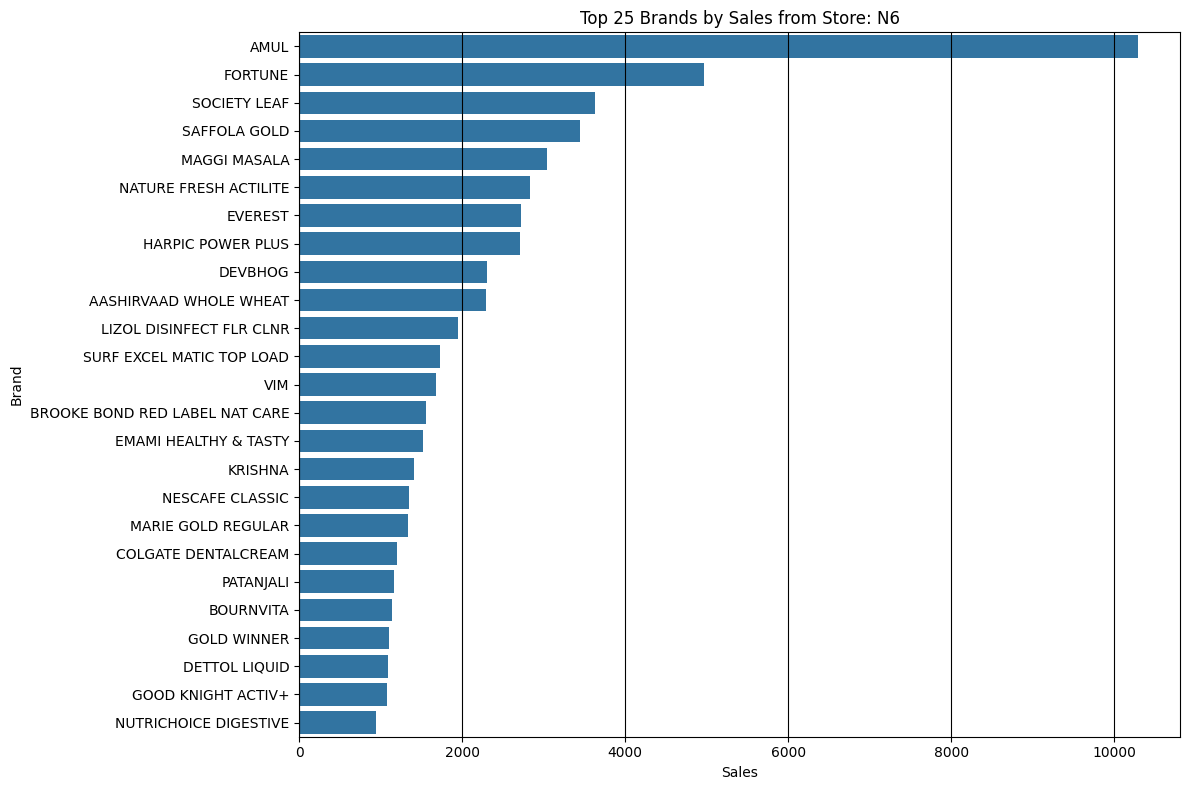

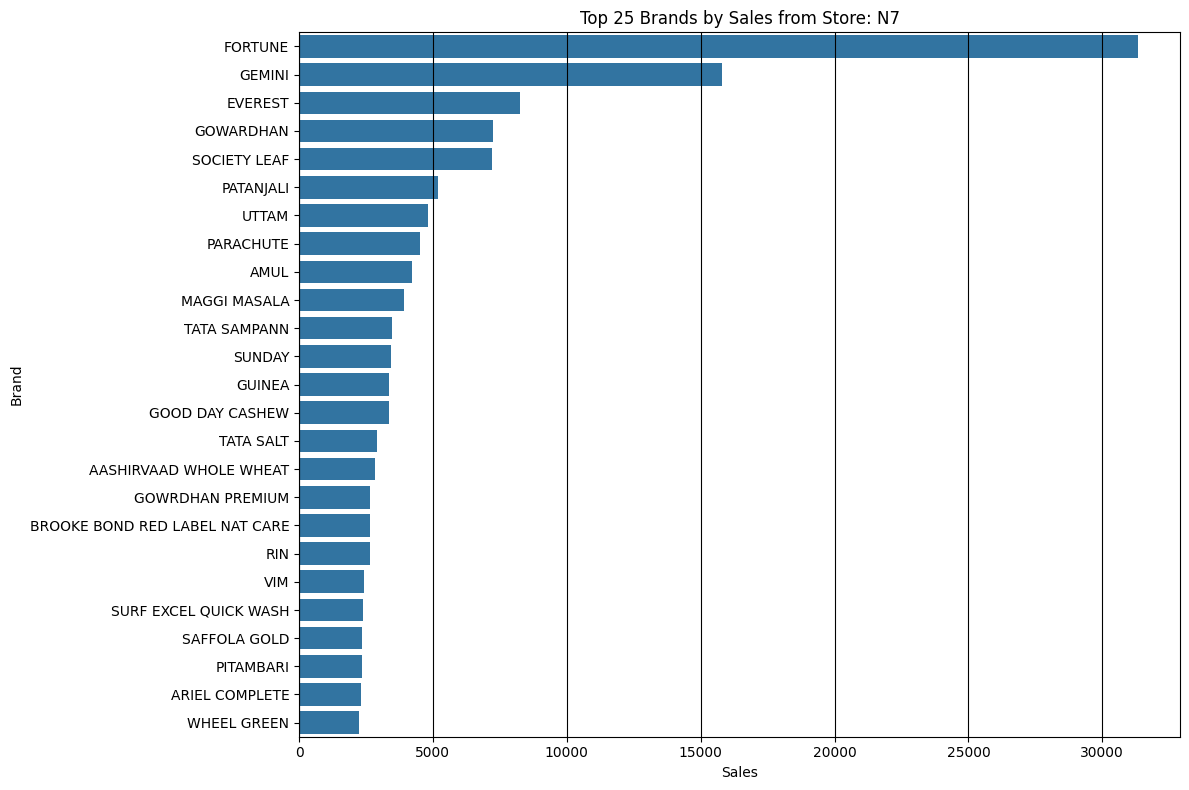

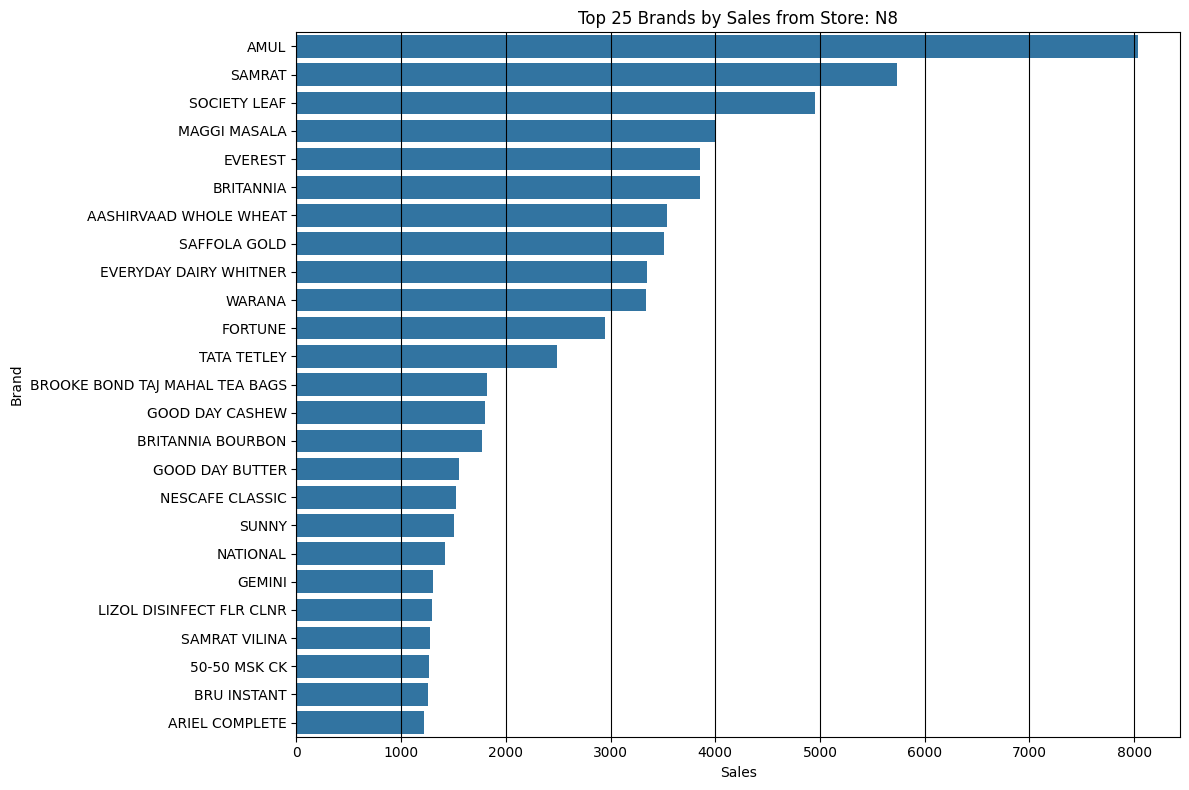

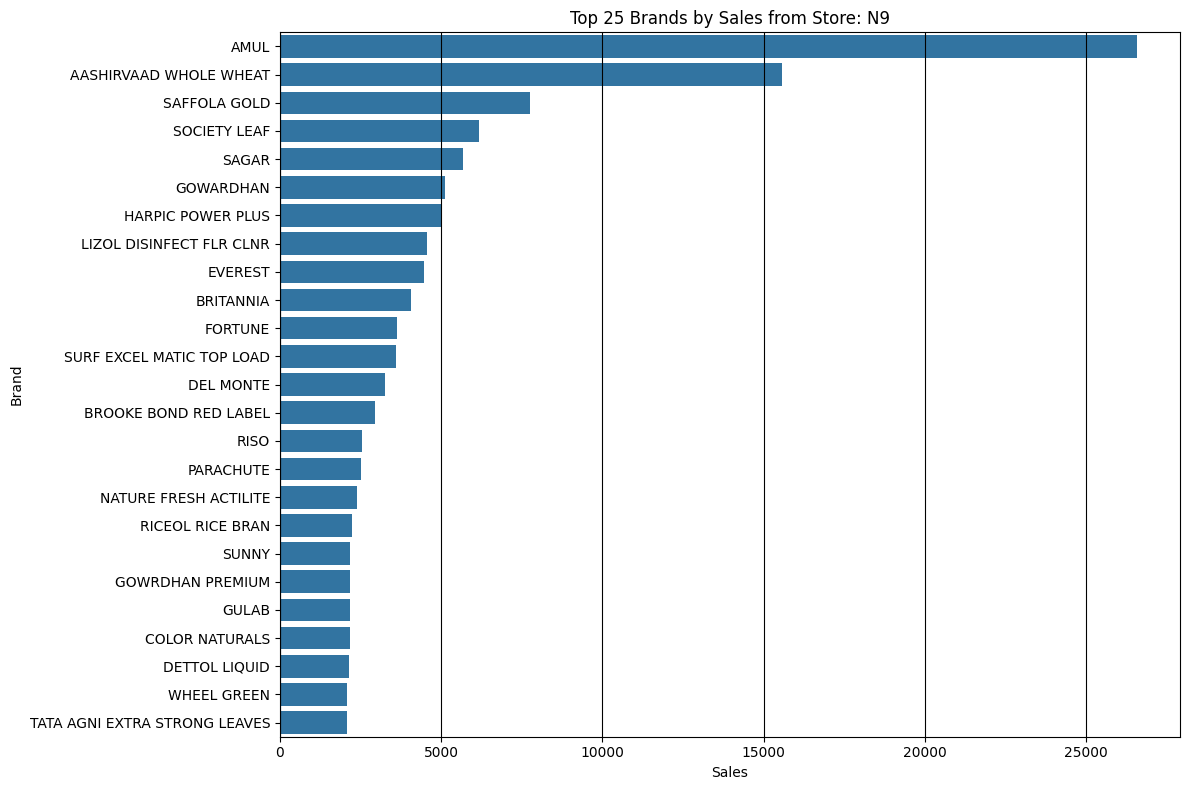

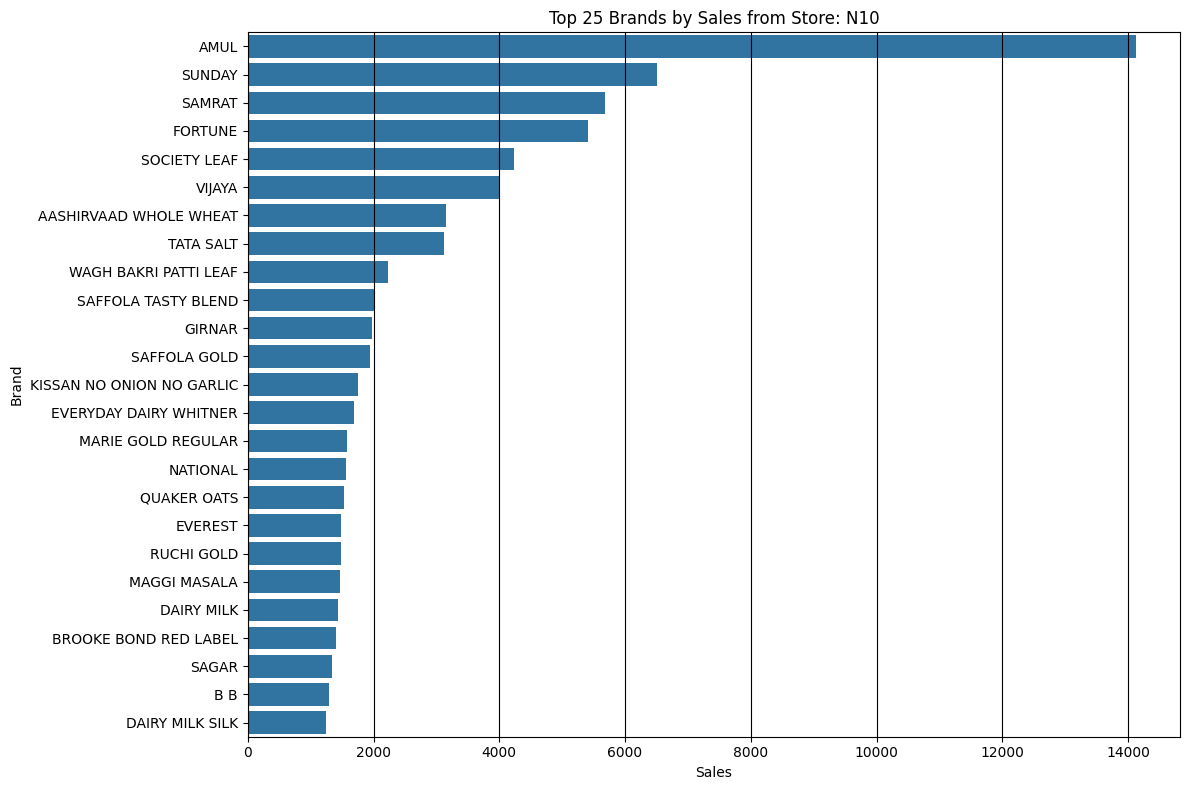

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate over unique store codes
for store_code in df['STORECODE'].unique():
    # Filter data for the current store code
    store_data = df[df['STORECODE'] == store_code]

    # Group by 'BRD' and sum the values
    brands_sales_by_store = store_data.groupby('BRD').sum()

    # Sort the values by sales in descending order and select the top 25 brands
    top_brands_sales_by_store = brands_sales_by_store.sort_values('VALUE', ascending=False).head(25)

    # Plot the top 25 brands by sales for the current store
    plt.figure(figsize=(12, 8))
    sns.barplot(x='VALUE', y=top_brands_sales_by_store.index, data=top_brands_sales_by_store, orient='h')
    plt.title("Top 25 Brands by Sales from Store: " + store_code)
    plt.xlabel("Sales")
    plt.ylabel("Brand")
    plt.grid(axis='x', color='black')
    plt.tight_layout()
    plt.show()

NO.OF UNIQUE BRANDS SOLD BY EACH STORE

In [41]:
str_brd = df.groupby("STORECODE")["BRD"].nunique().sort_values(ascending=False)
print(str_brd)

STORECODE
N5     572
N7     496
N1     447
N4     357
N9     347
N3     326
N2     313
N6     284
N10    272
N8     261
Name: BRD, dtype: int64


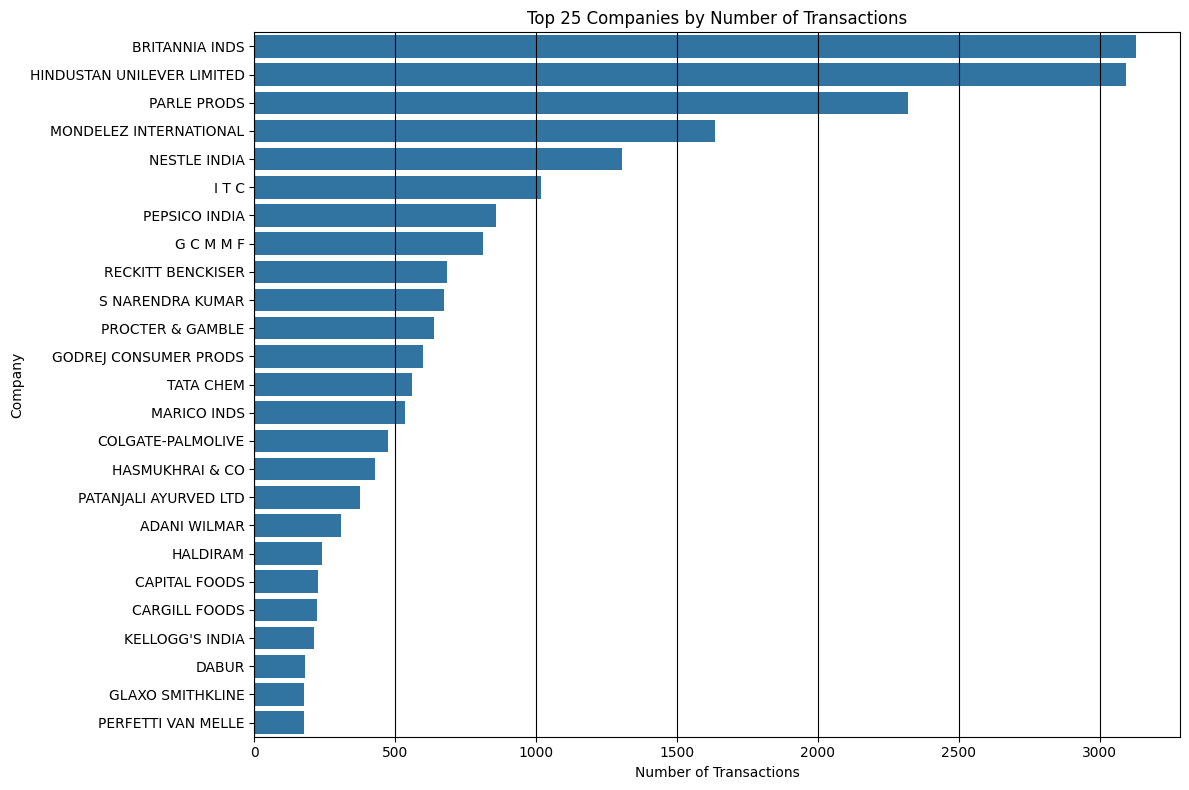

In [42]:
# Count the number of transactions for each company
company_counts = df['CMP'].value_counts().head(25)

# Plot the distribution of transactions among the top 25 companies
plt.figure(figsize=(12, 8))
sns.barplot(x=company_counts.values, y=company_counts.index, orient='h')
plt.title("Top 25 Companies by Number of Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Company")
plt.grid(axis='x', color='black')
plt.tight_layout()
plt.show()